In [11]:
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Numerical Data

In [4]:
df = pd.DataFrame(np.random.randint(30, 81, size=100), columns=["Value"])
df

Value
0      42
1      47
2      60
3      53
4      59
..    ...
95     79
96     40
97     30
98     65
99     33

[100 rows x 1 columns]

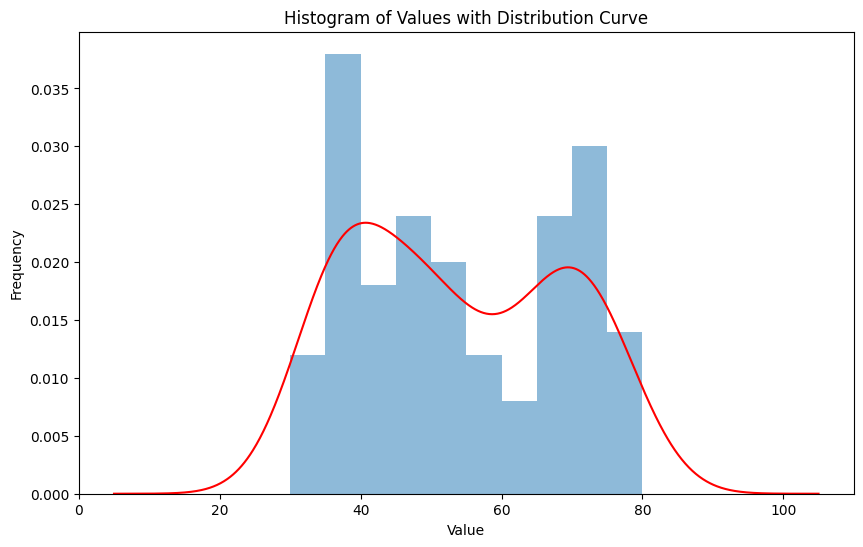

In [6]:
plt.figure(figsize=(10, 6))
df["Value"].hist(bins=10, density=True, alpha=0.5)
df["Value"].plot(kind="density", color="red")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Values with Distribution Curve")
plt.show()

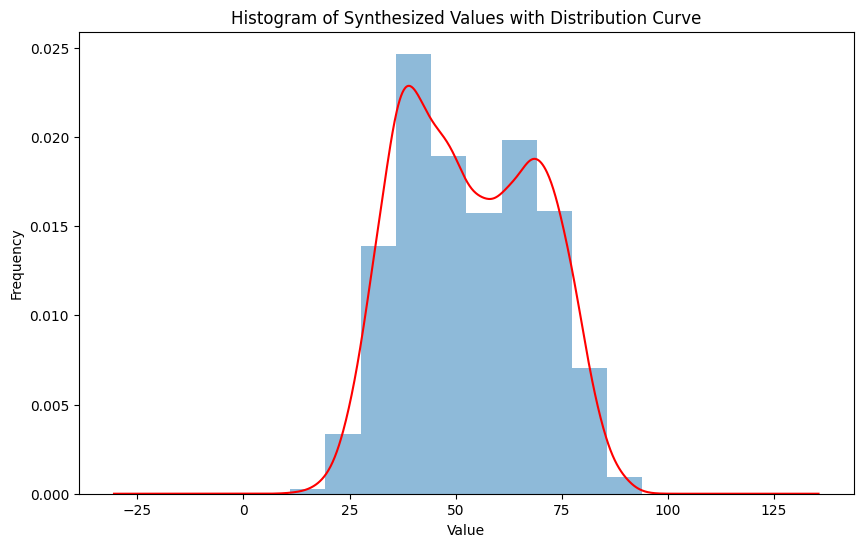

In [13]:
kde = gaussian_kde(df["Value"])

# Synthesize new data using the estimated probability density function
new_data = kde.resample(10000)[0]
new_df = pd.DataFrame({"Value": new_data.astype(int)})

# Create a histogram with distribution curve for the new data
plt.figure(figsize=(10, 6))
new_df["Value"].hist(bins=10, density=True, alpha=0.5)
new_df["Value"].plot(kind="density", color="red")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Synthesized Values with Distribution Curve")
plt.show()

# Categorical Data

In [14]:
categories = ["A", "B", "C", "D", "E"]
df = pd.DataFrame({"Category": np.random.choice(categories, size=100)})
df

Category
0         D
1         B
2         A
3         D
4         D
..      ...
95        D
96        C
97        C
98        B
99        A

[100 rows x 1 columns]

In [15]:
category_counts = df["Category"].value_counts()
category_probs = category_counts / len(df)

In [20]:
new_data = np.random.choice(categories, size=100, p=category_probs)
new_df = pd.DataFrame({"Category": new_data})

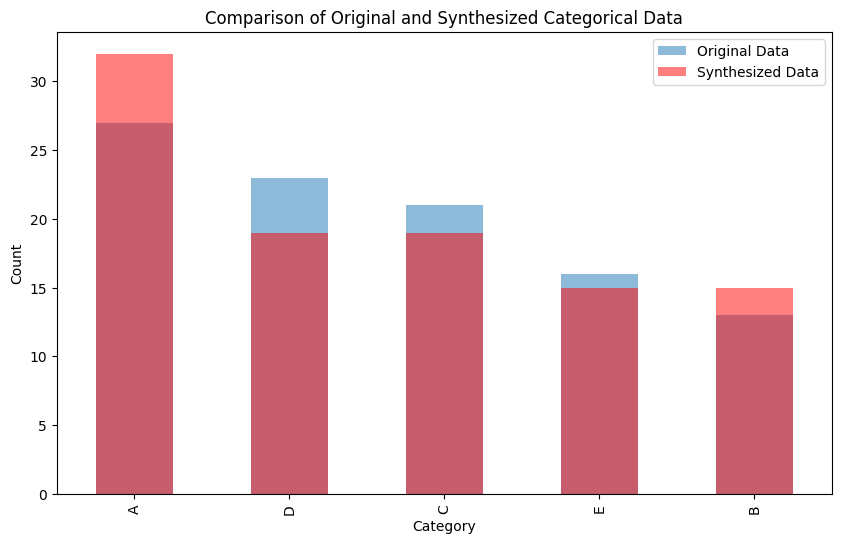

In [21]:
plt.figure(figsize=(10, 6))
ax = df["Category"].value_counts().plot(kind="bar", alpha=0.5)
new_df["Category"].value_counts().plot(kind="bar", color="r", alpha=0.5, ax=ax)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Comparison of Original and Synthesized Categorical Data")
plt.legend(["Original Data", "Synthesized Data"])
plt.show()

# CSV FIle

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Load the original medical data
original_data = pd.read_csv("./Data (1).csv")

# Initialize an empty list to store the synthesized data
synthesized_data = []

# Iterate through each column in the original data
for col in original_data.columns:
    # Check the data type of the column
    if original_data[col].dtype == "object":
        # For categorical columns, get the value counts and probabilities
        value_counts = original_data[col].value_counts()
        probs = value_counts / value_counts.sum()  # Ensure probabilities sum to 1

        # Synthesize new data using the same probabilities
        new_values = np.random.choice(value_counts.index, size=10000, p=probs)
        synthesized_data.append(new_values)
    else:
        # For numerical columns, check for inf or NaN values
        if original_data[col].isin([np.inf, -np.inf, np.nan]).any():
            # Replace inf or NaN values with the column median
            original_data[col] = original_data[col].replace(
                [np.inf, -np.inf, np.nan], original_data[col].median()
            )

        # Estimate the probability density function using KDE
        kde = gaussian_kde(original_data[col])
        new_values = kde.resample(10000)[0]
        synthesized_data.append(new_values)

# Create a new DataFrame with the synthesized data
synthesized_df = pd.DataFrame(synthesized_data).T
synthesized_df.columns = original_data.columns

# Handle mixed data types
for col in original_data.columns:
    if original_data[col].dtype == "object":
        synthesized_df[col] = synthesized_df[col].astype(original_data[col].dtype)
    else:
        synthesized_df[col] = synthesized_df[col].astype(int)

# Save the synthesized data to a new file
synthesized_df.to_csv("synthesized_medical_data.csv", index=False)

# New data

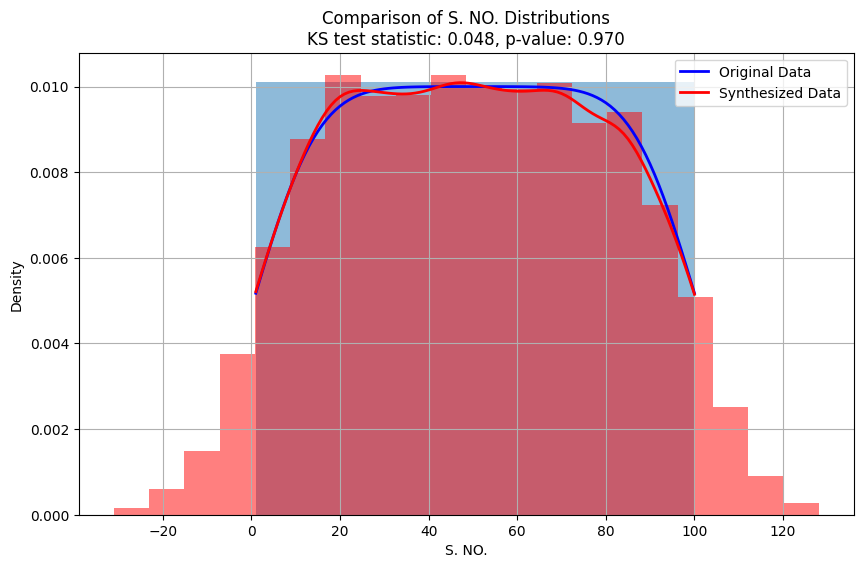

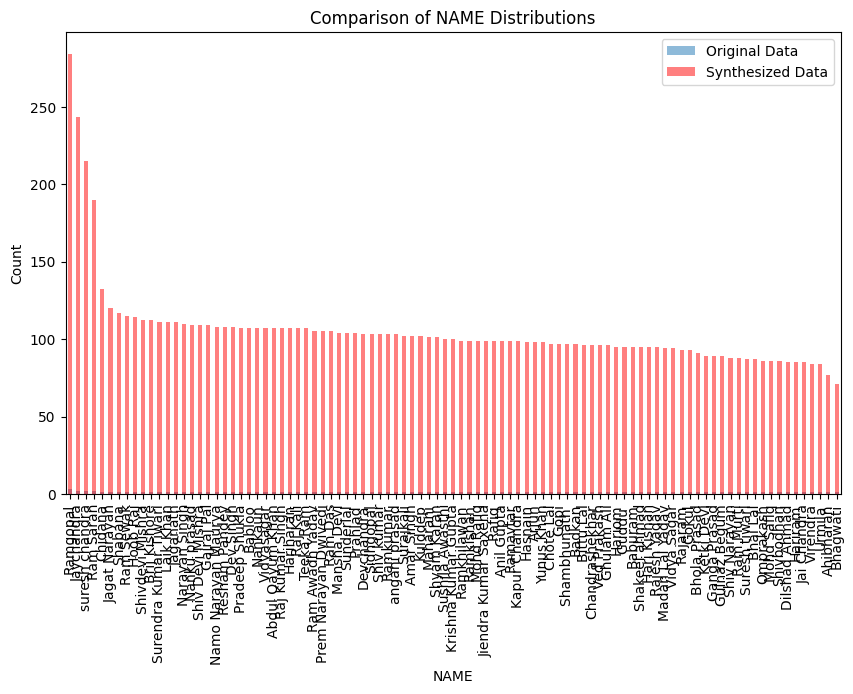

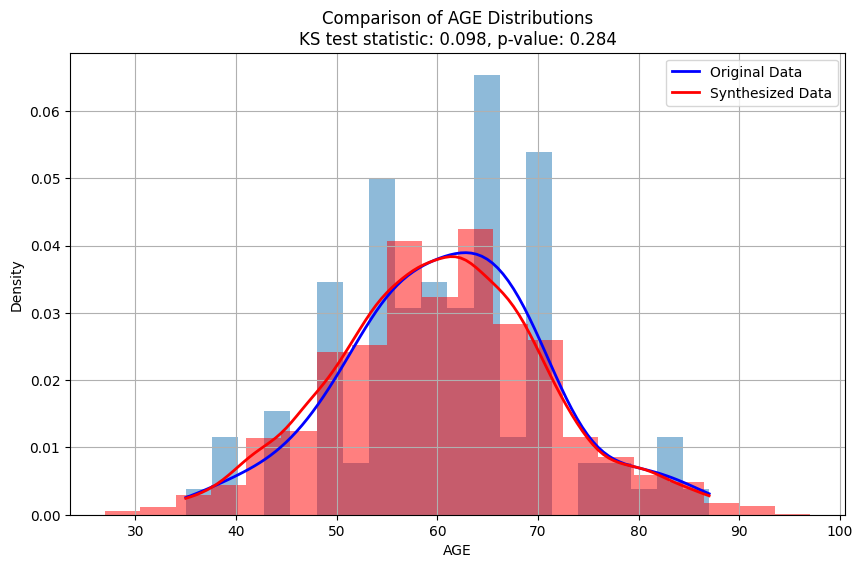

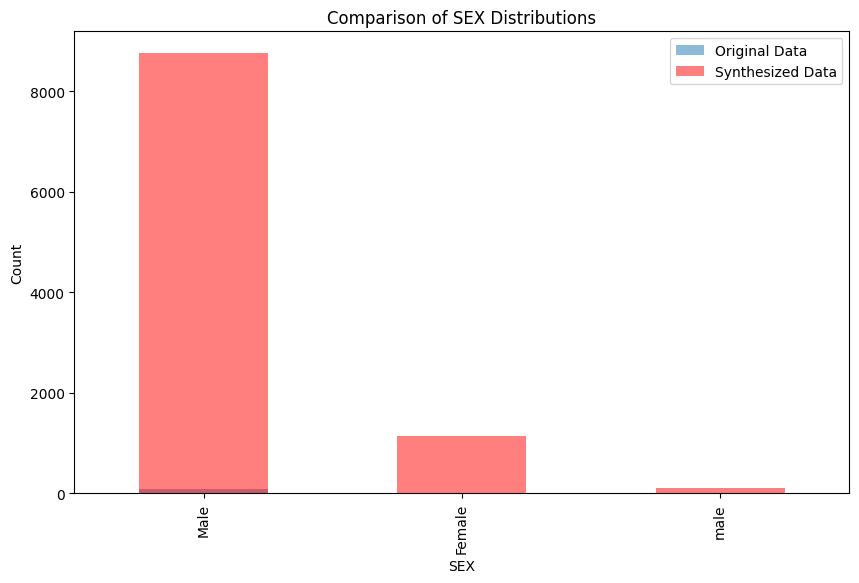

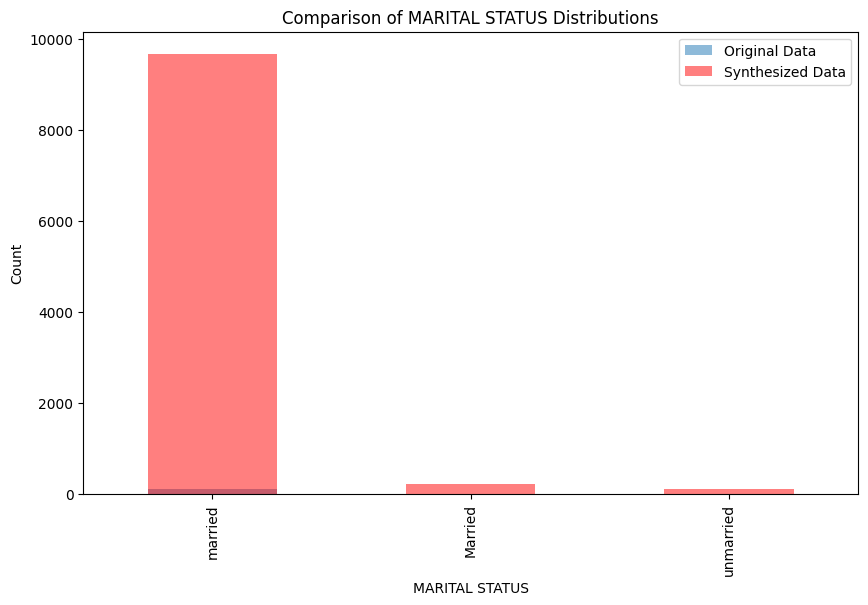

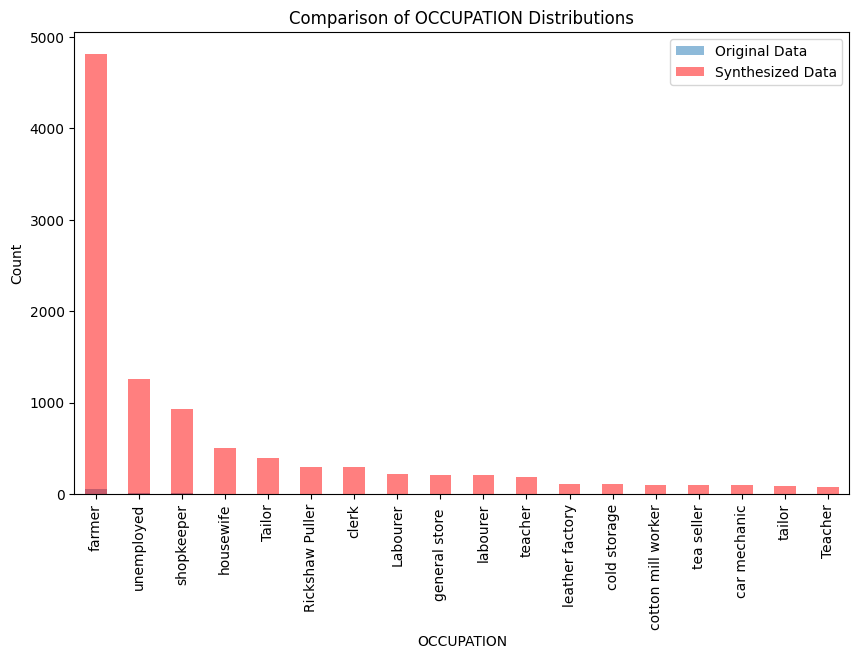

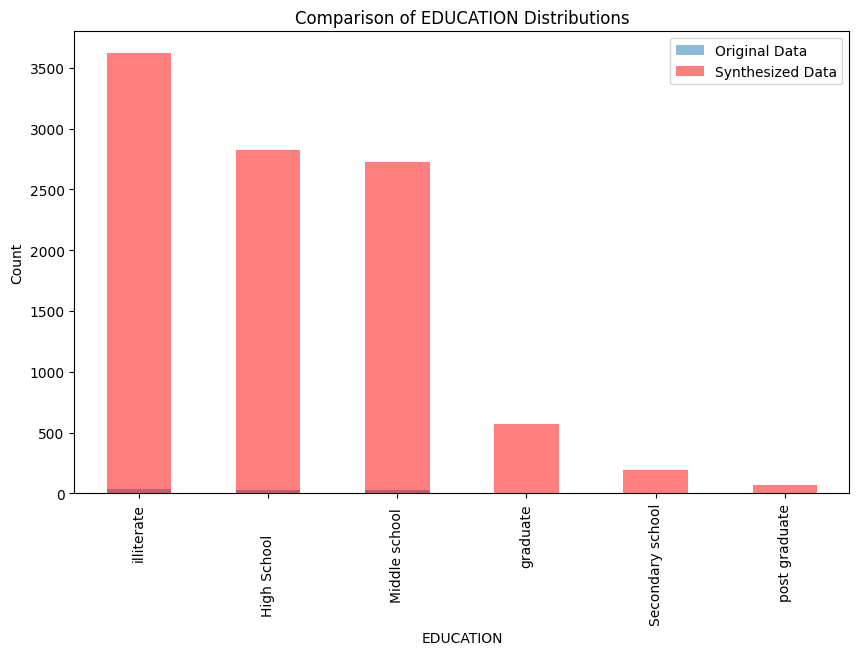

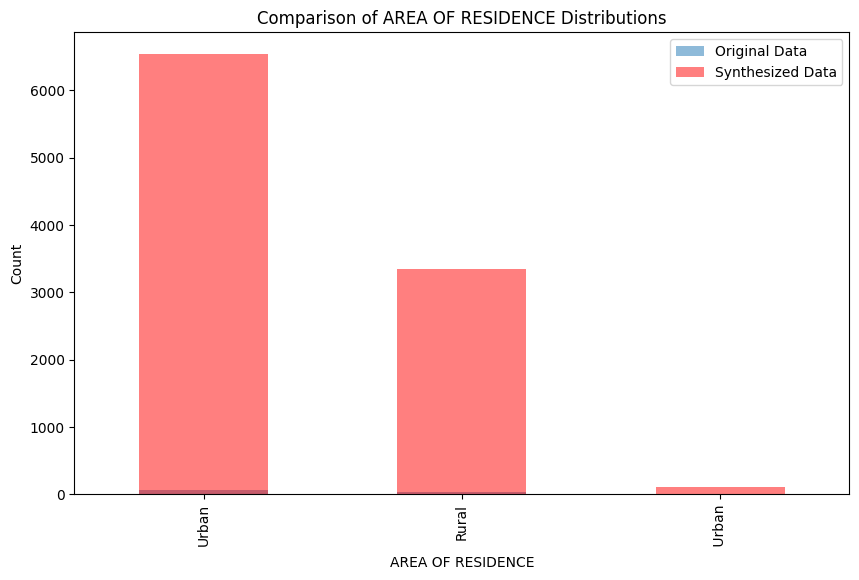

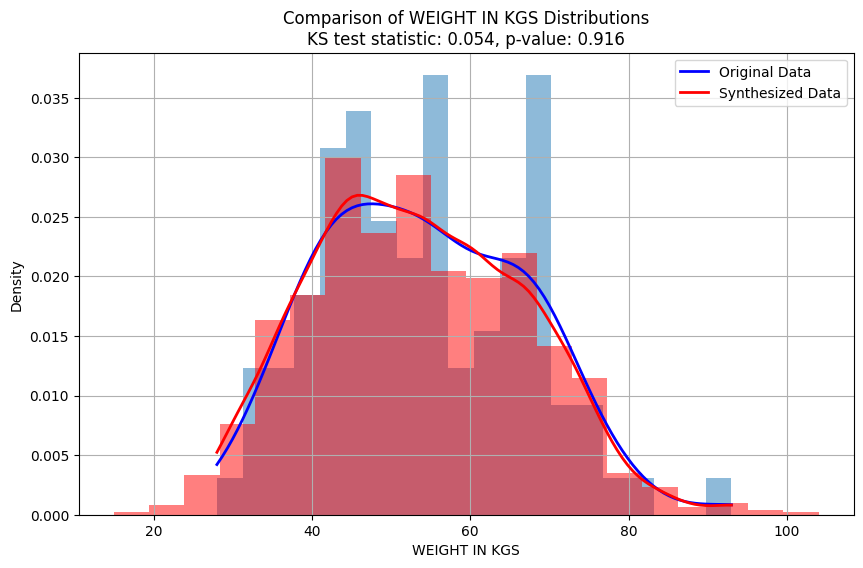

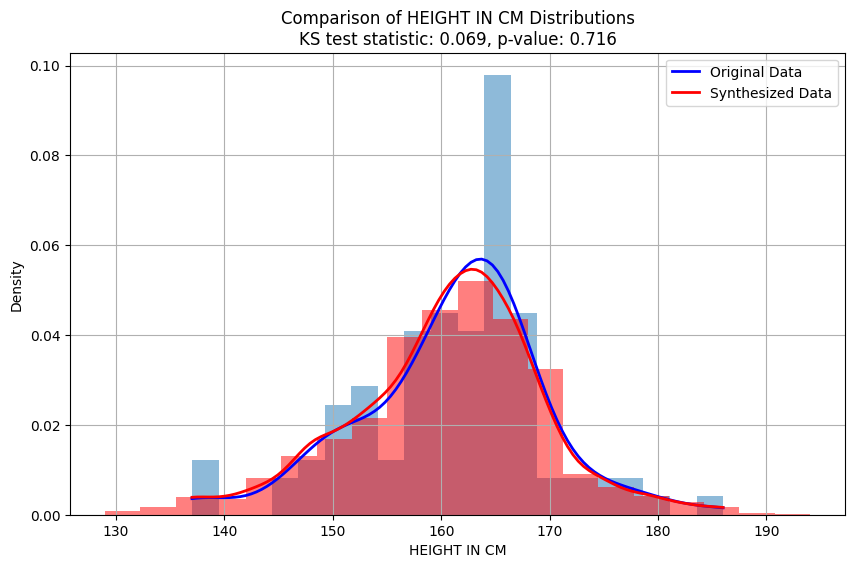

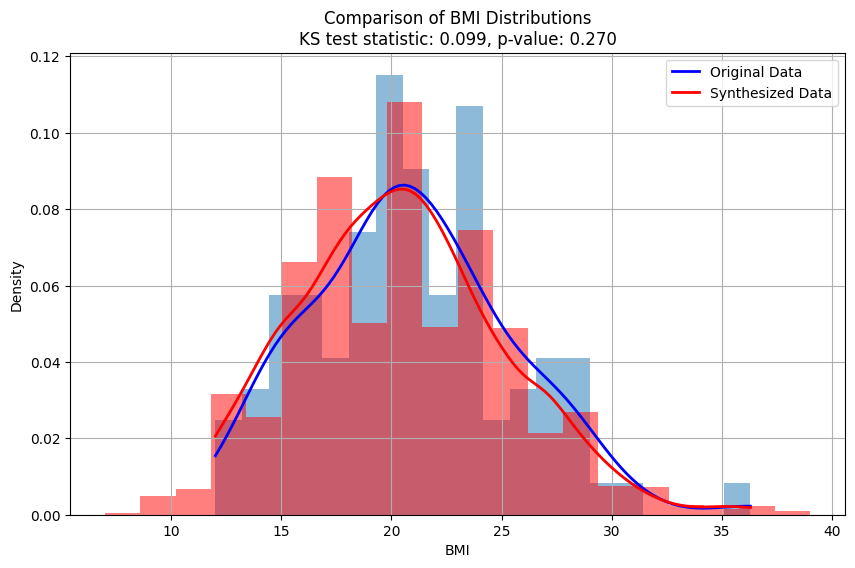

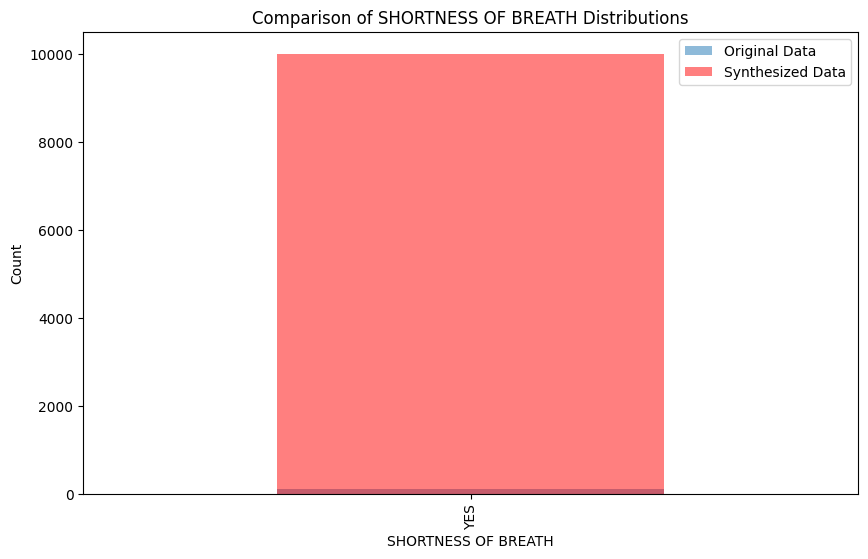

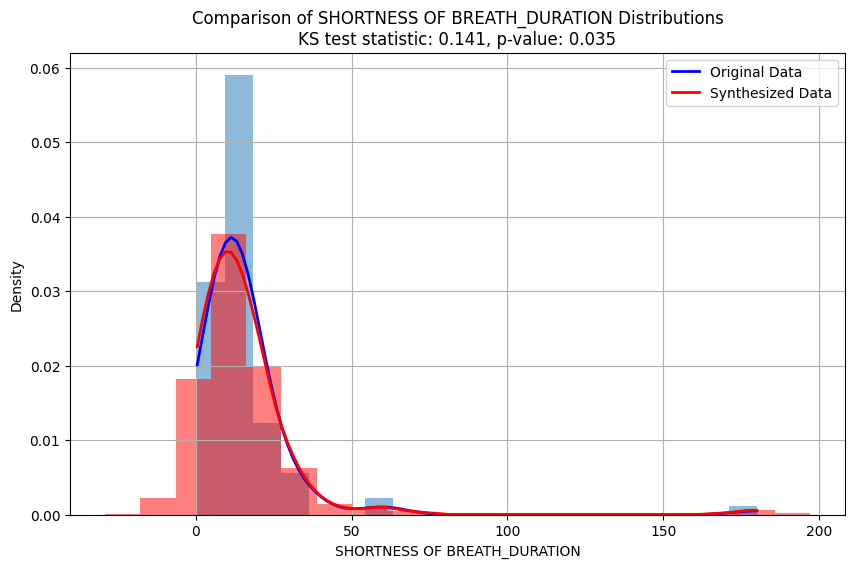

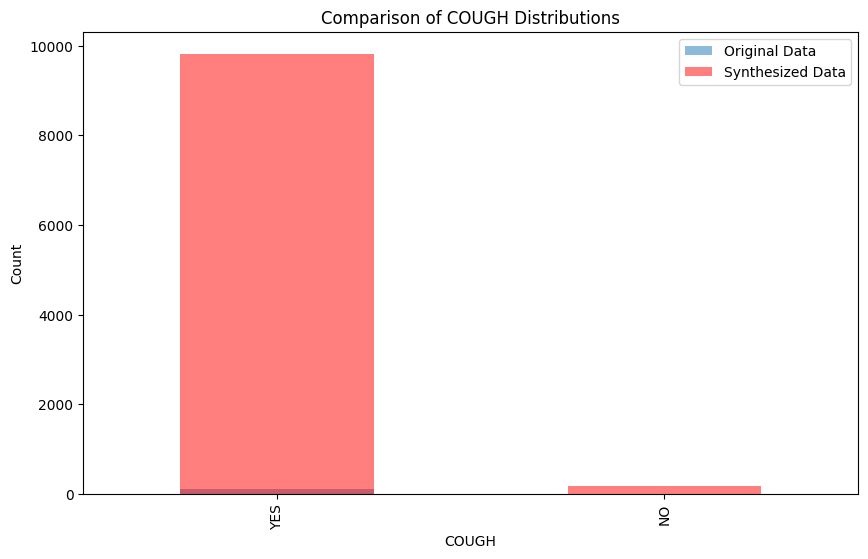

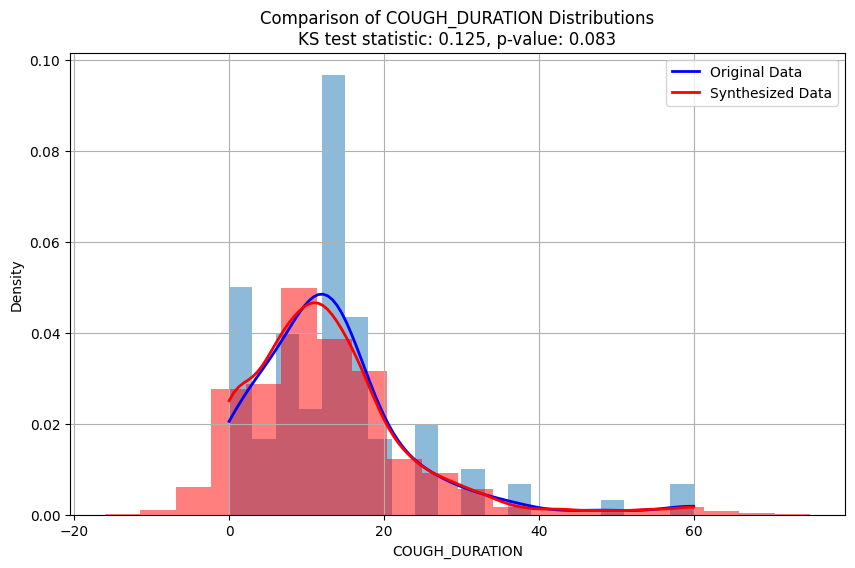

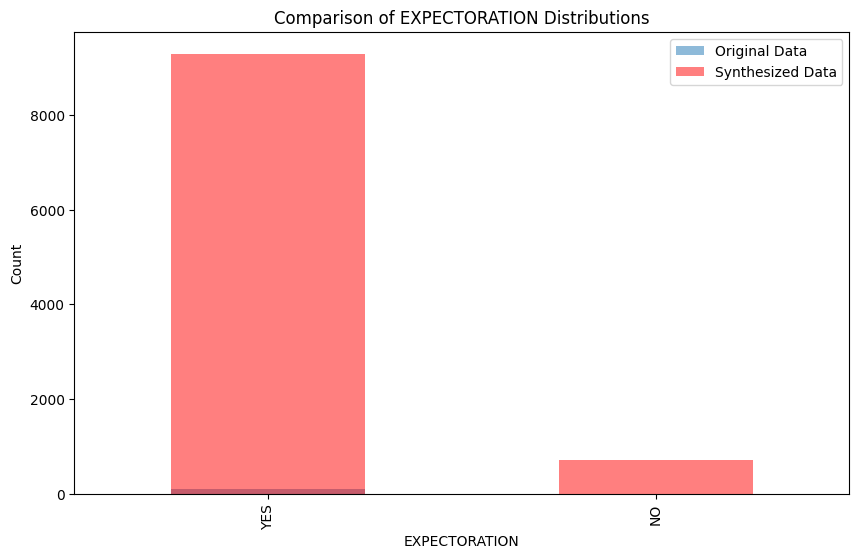

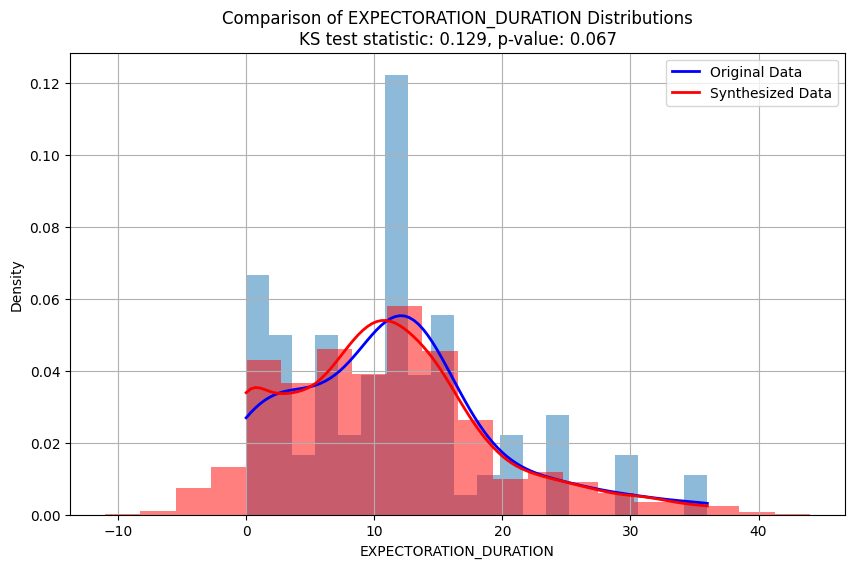

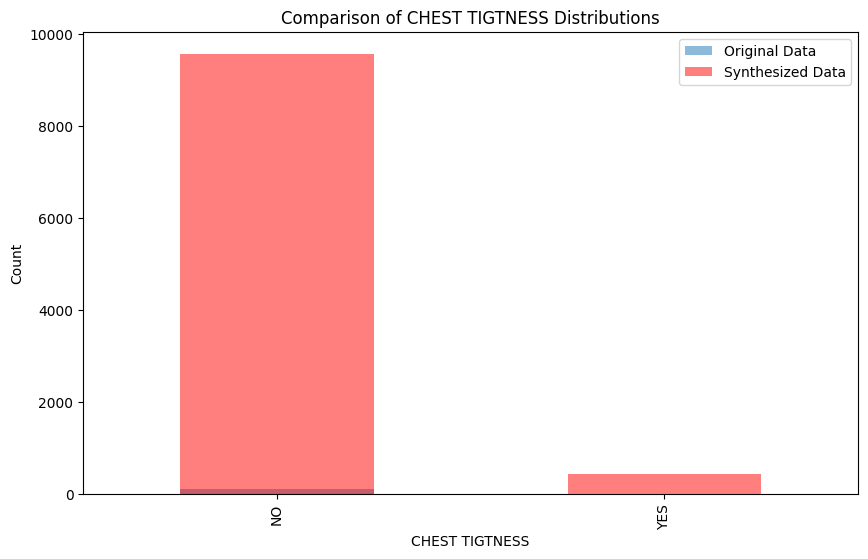

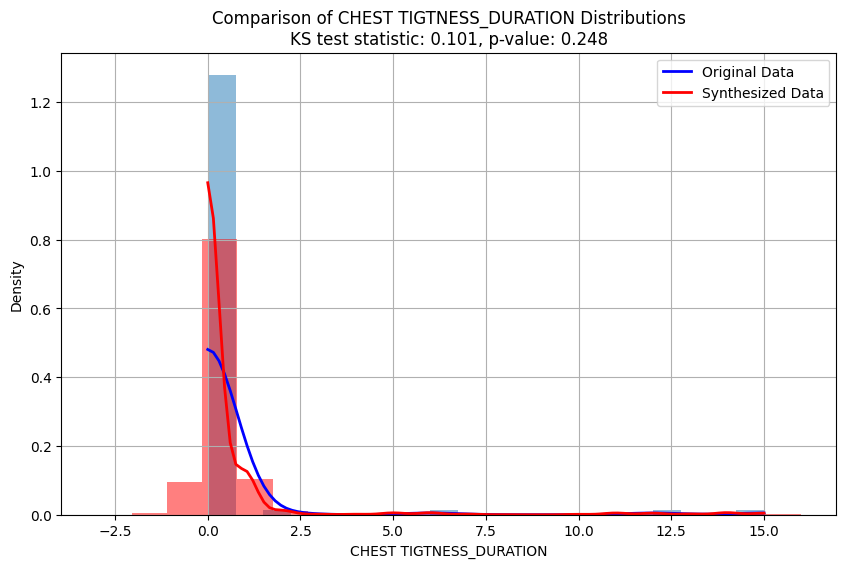

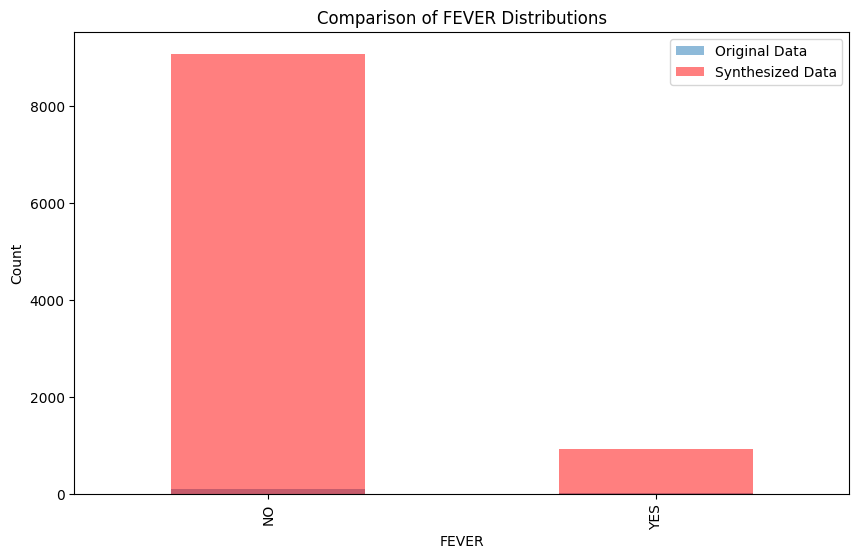

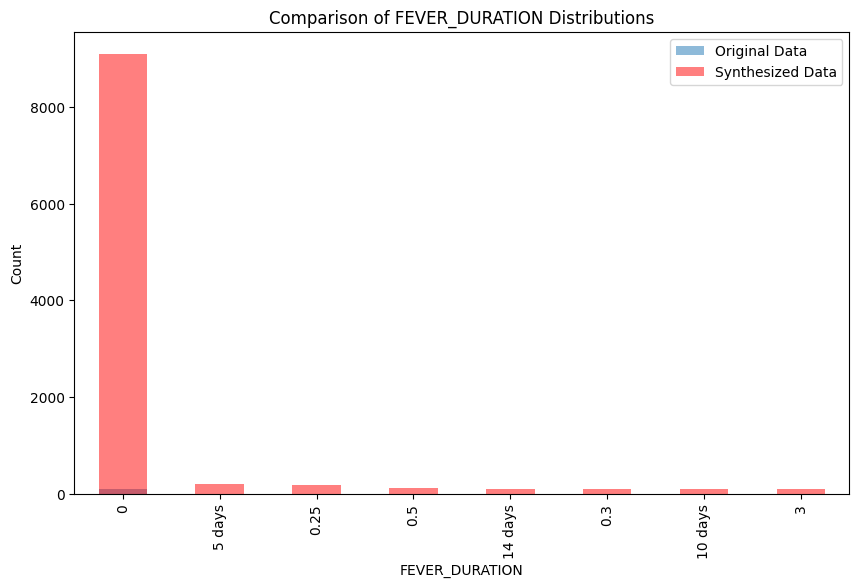

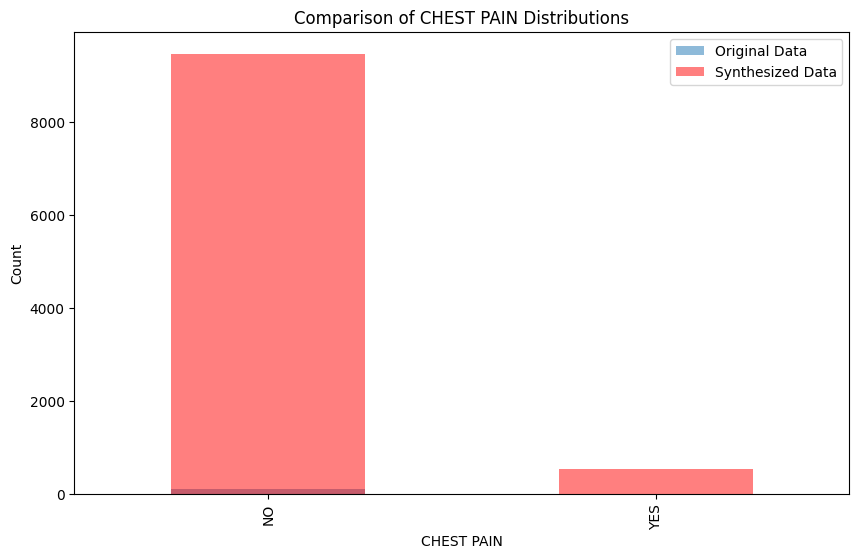

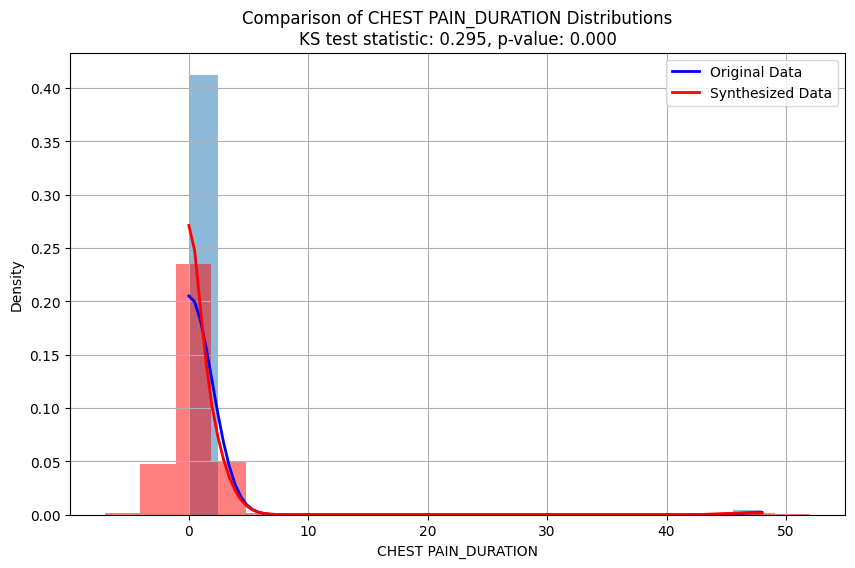

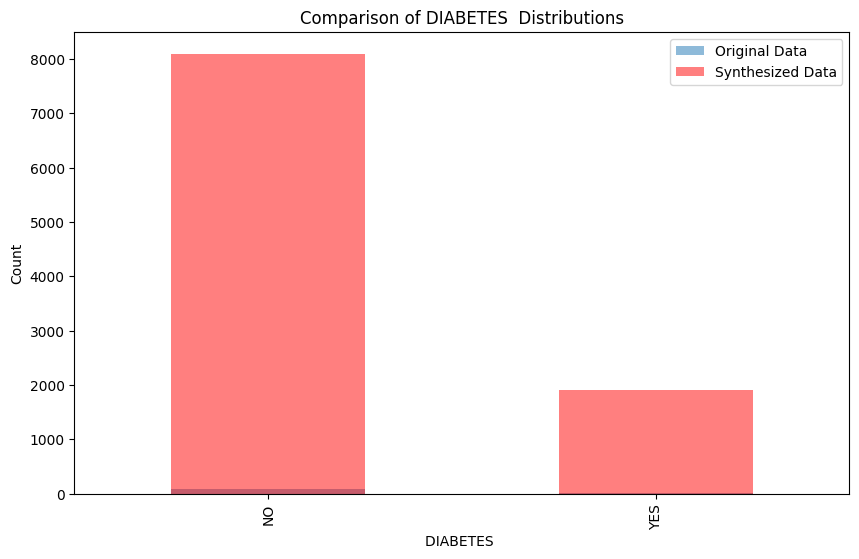

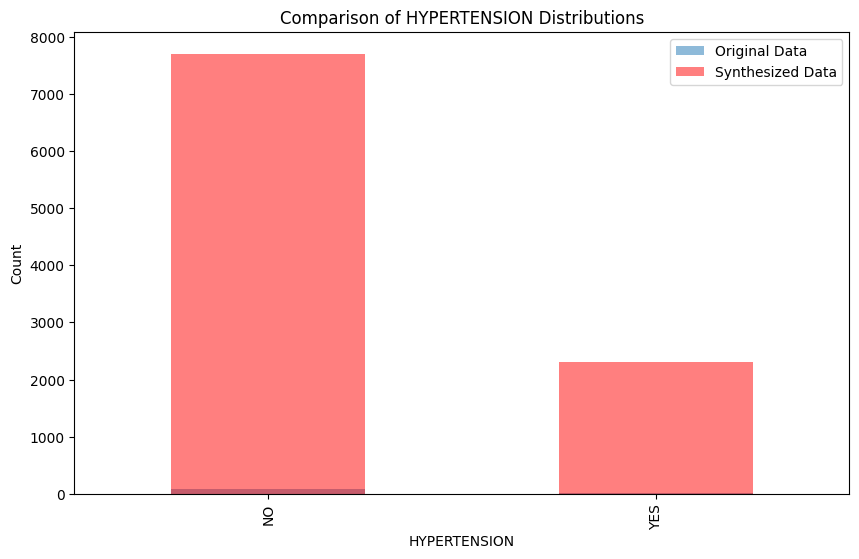

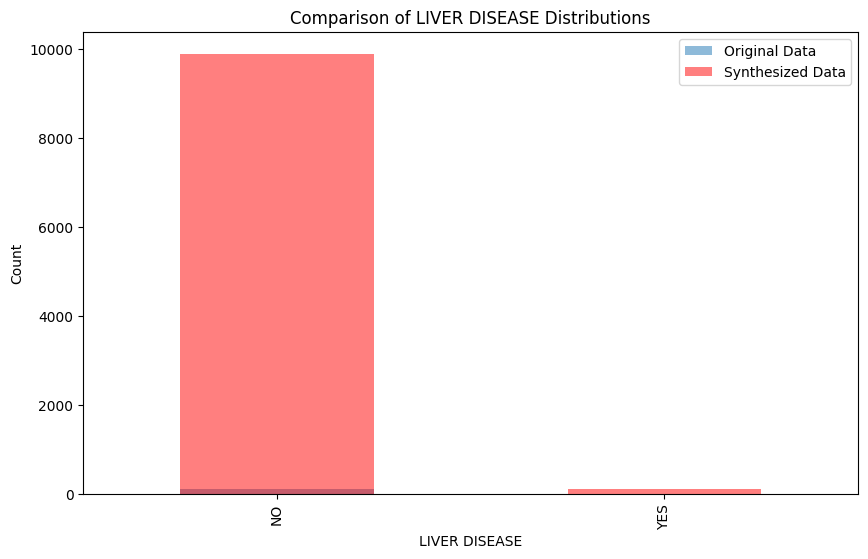

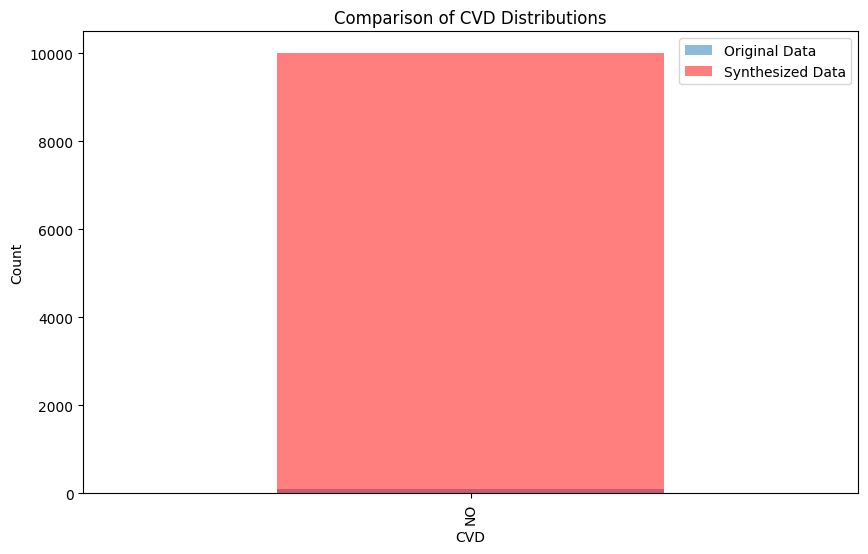

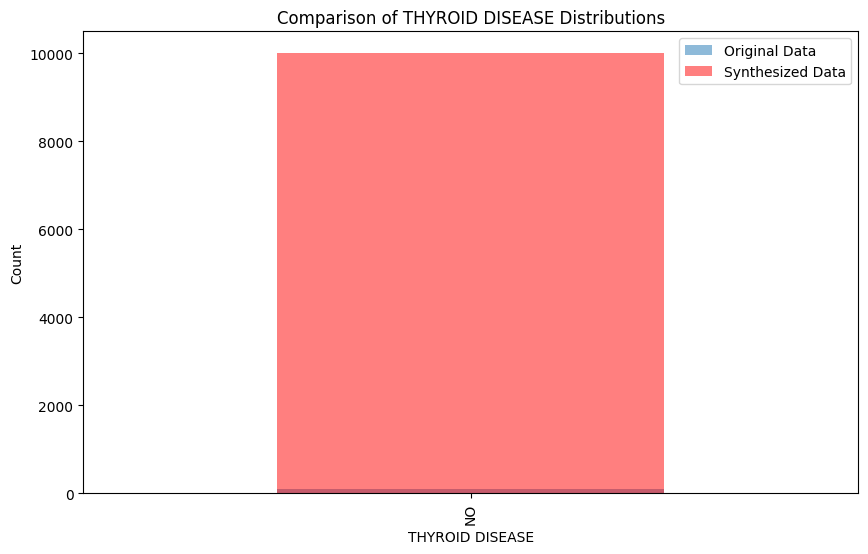

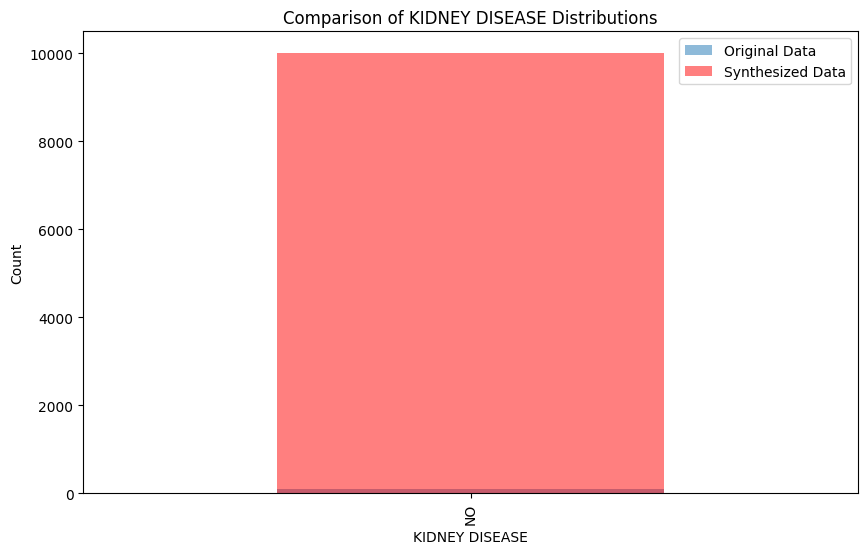

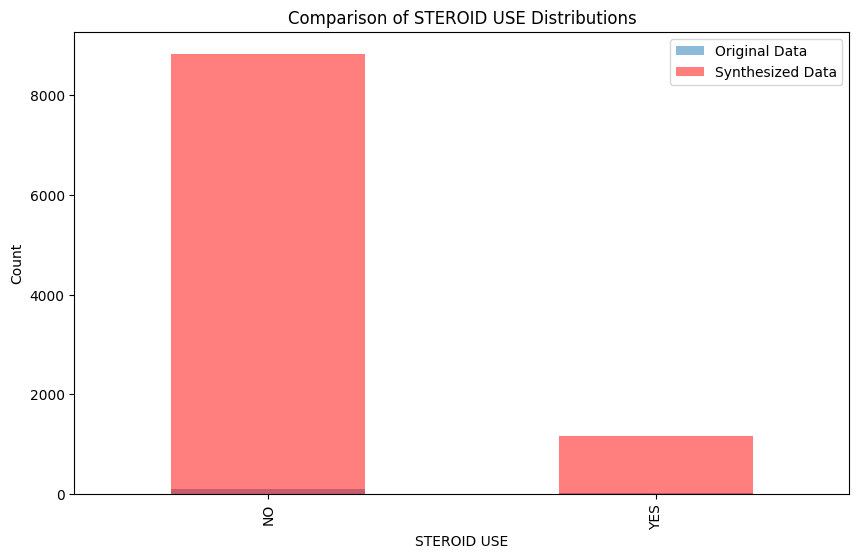

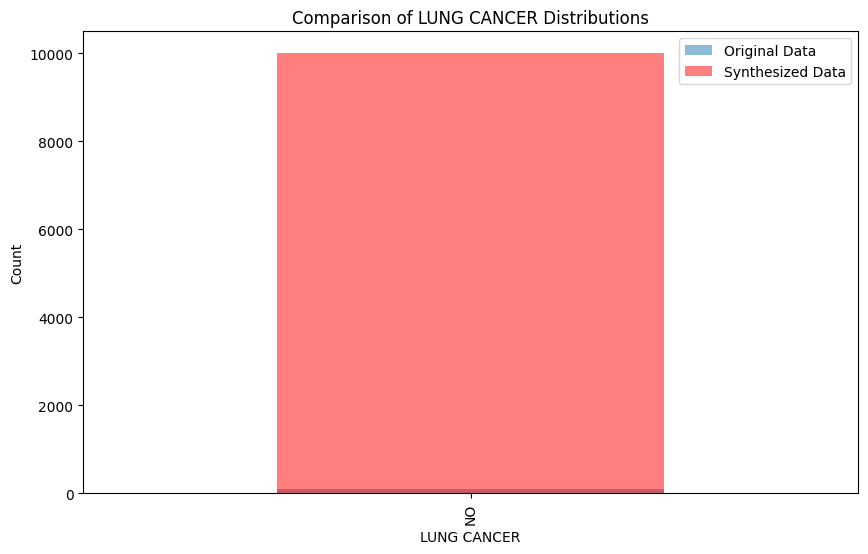

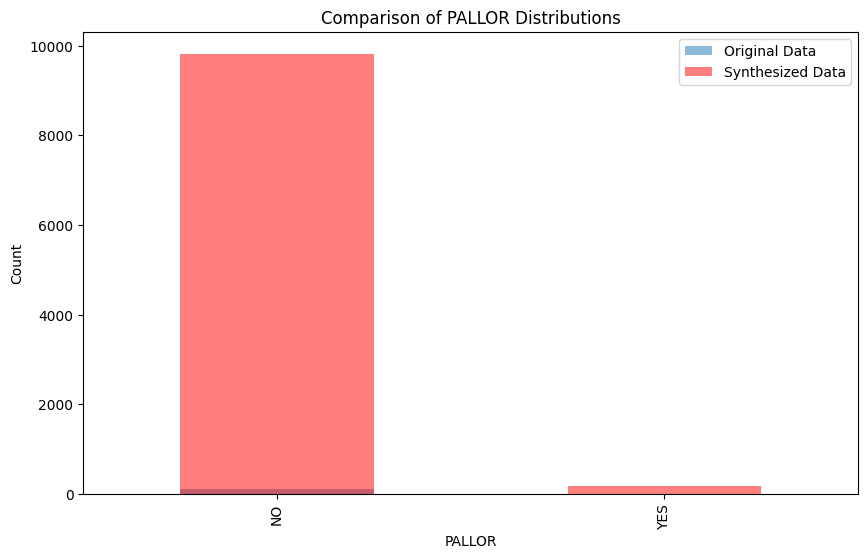

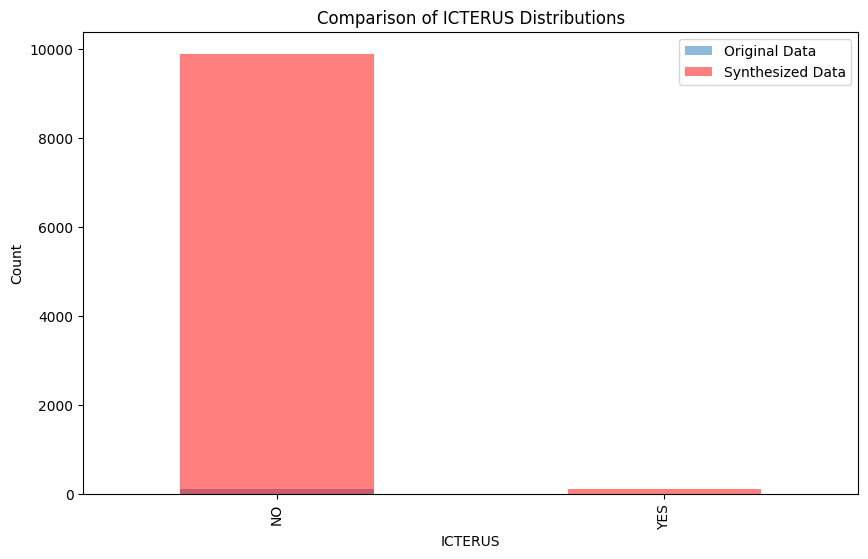

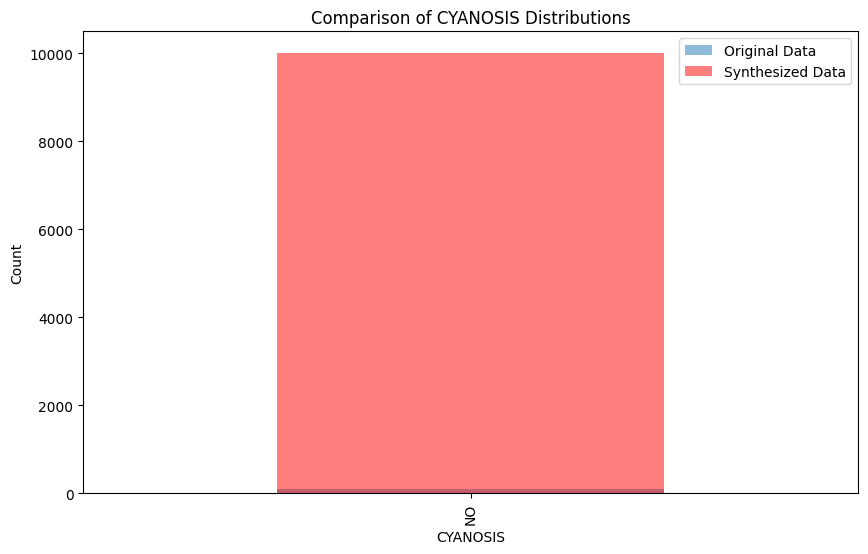

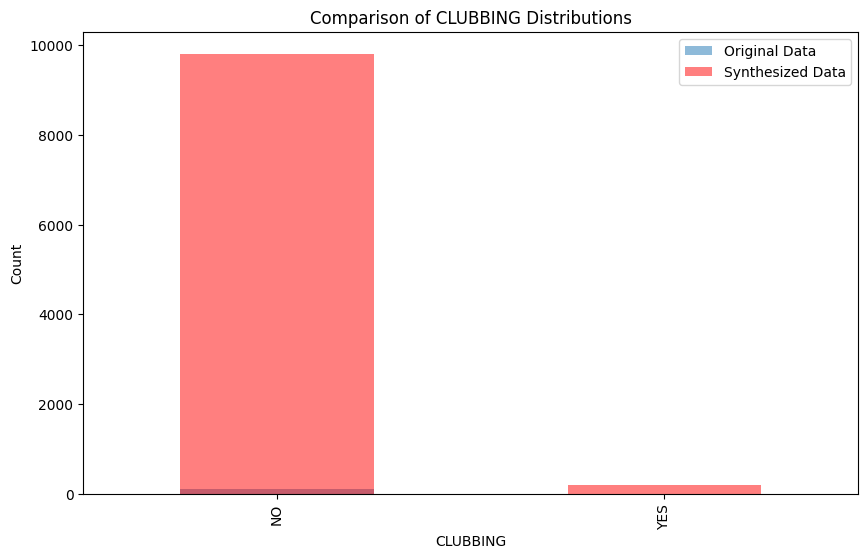

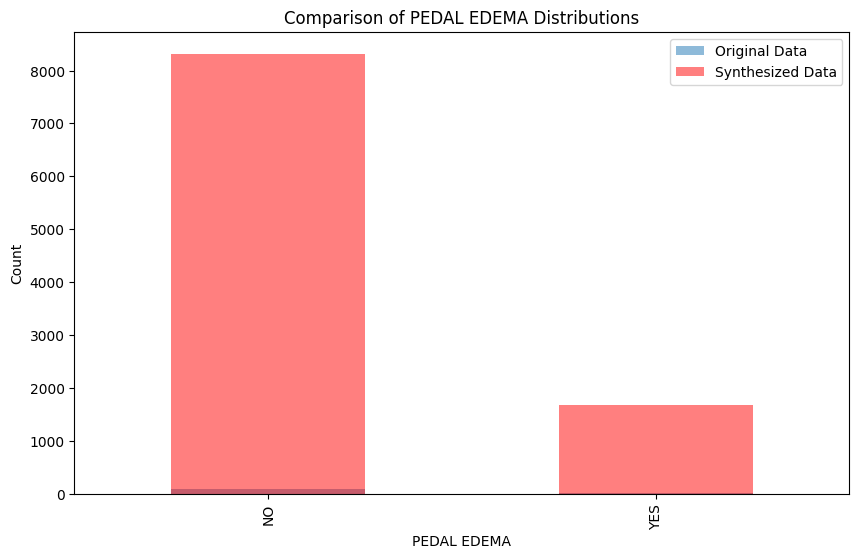

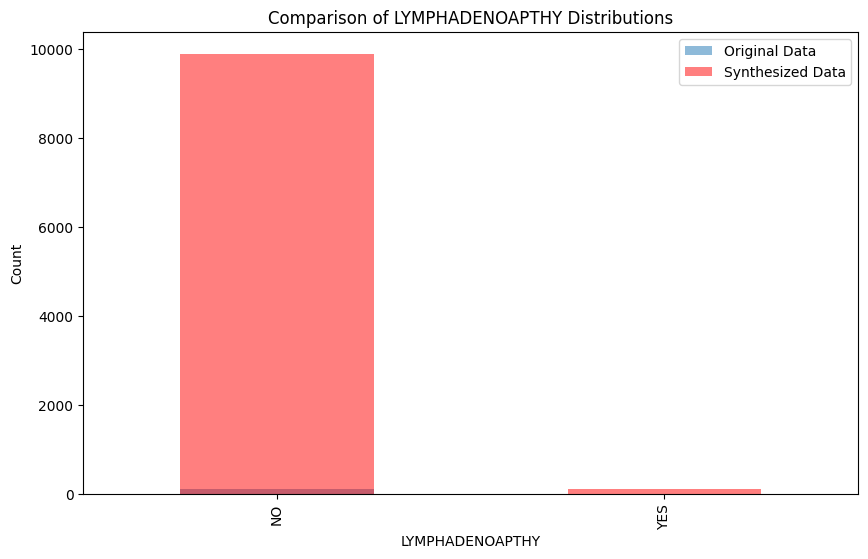

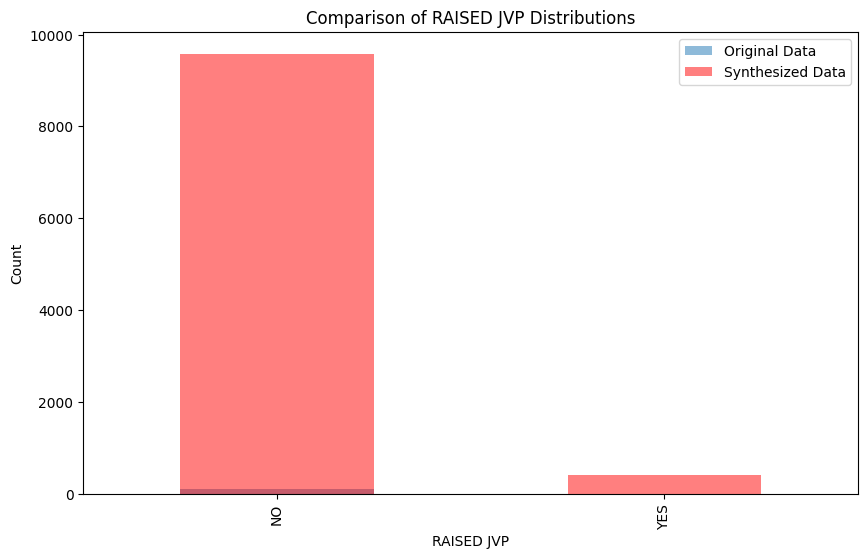

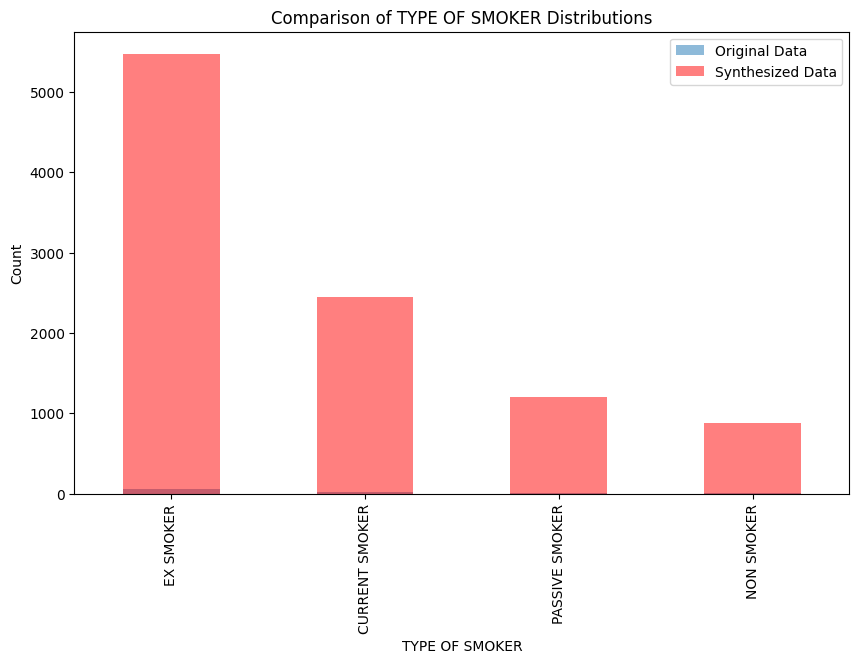

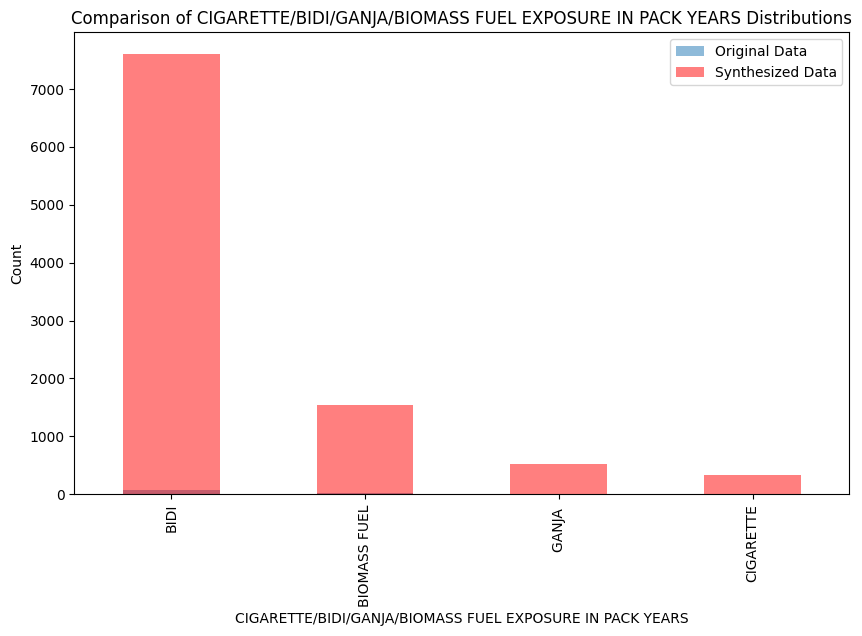

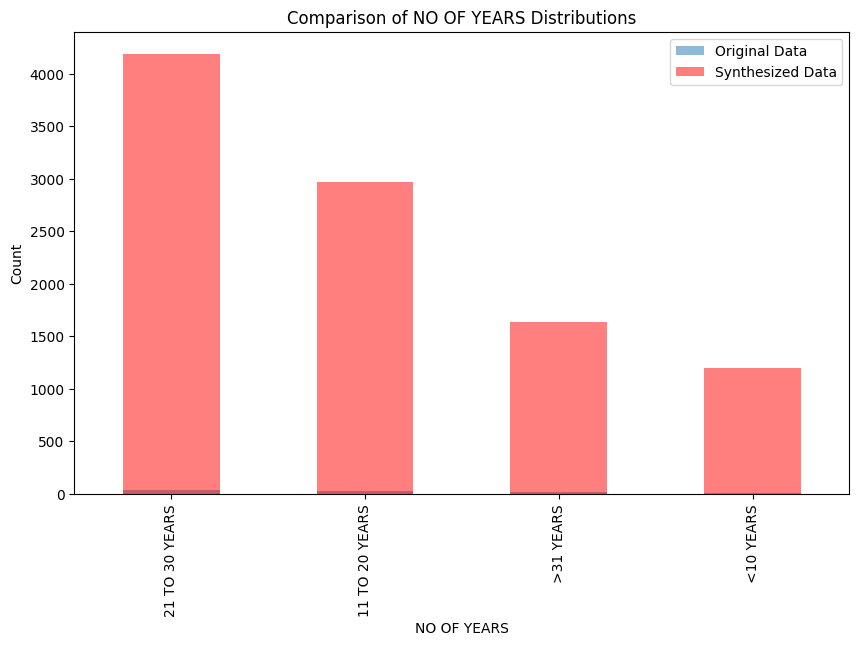

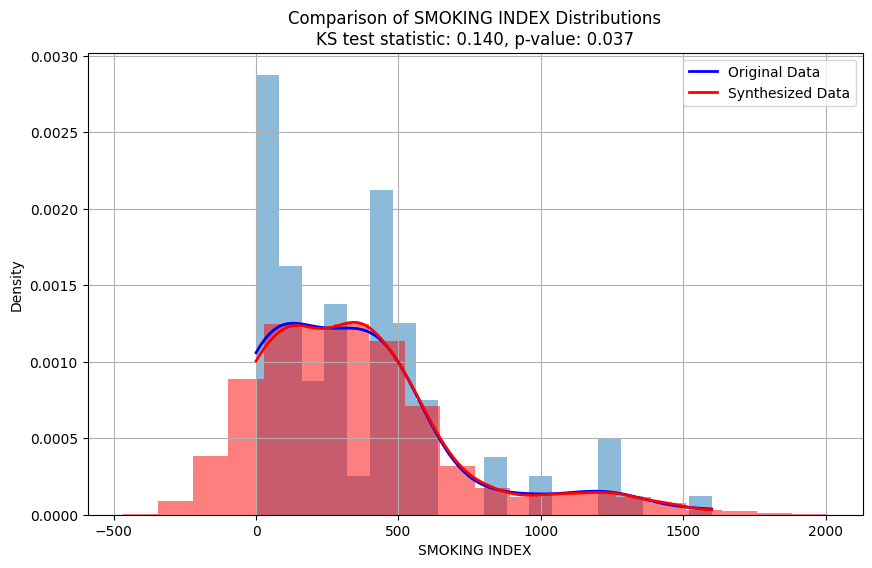

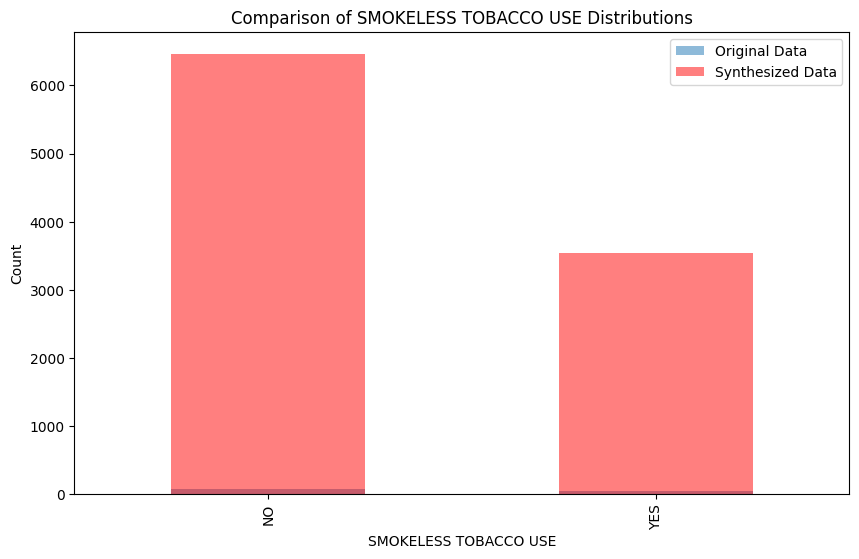

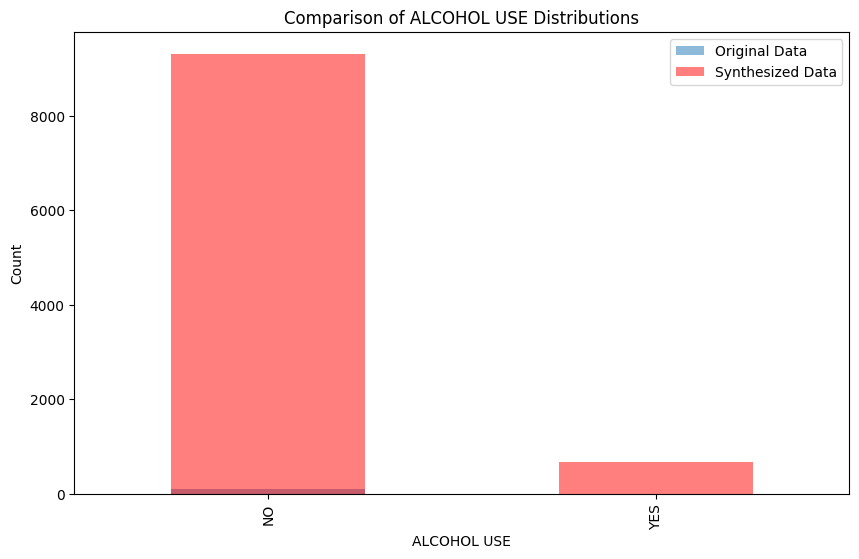

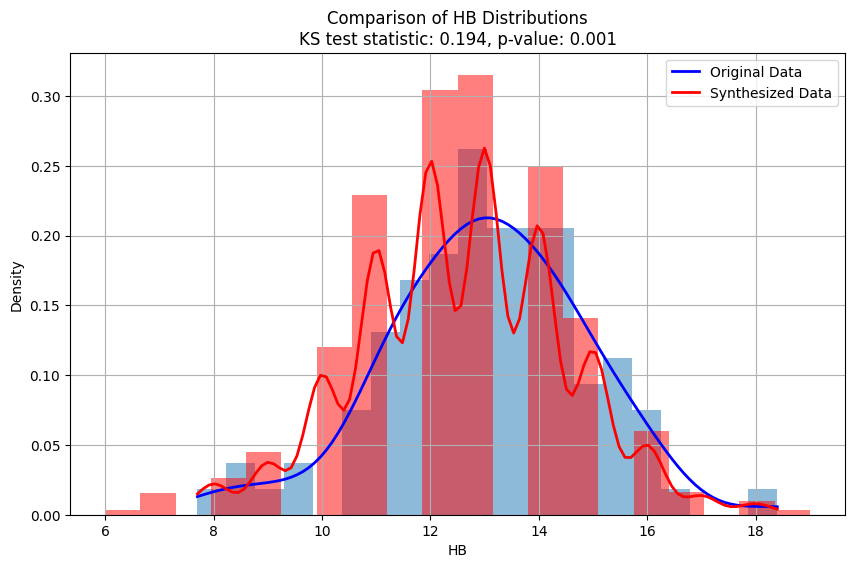

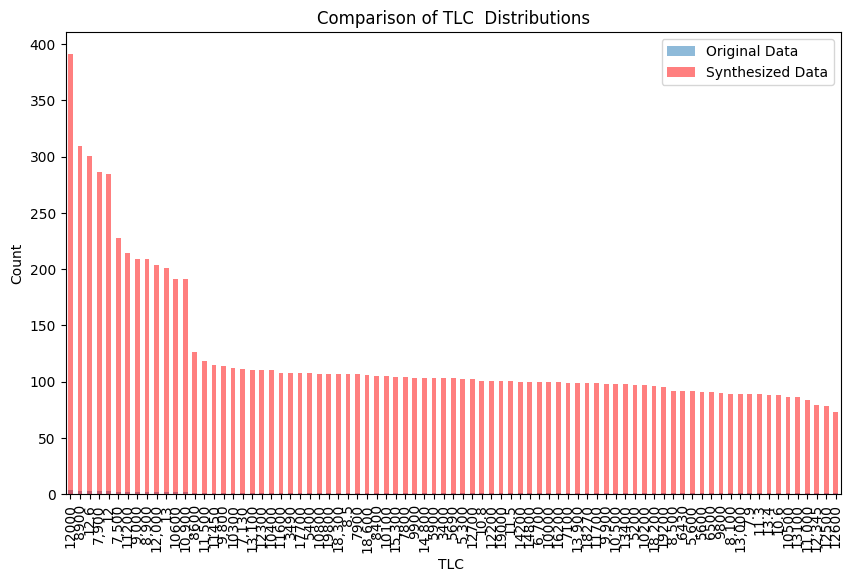

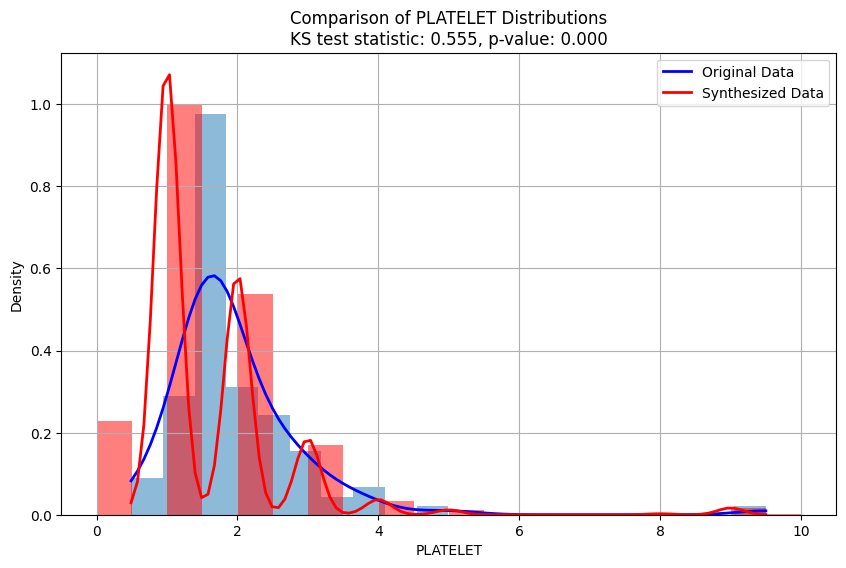

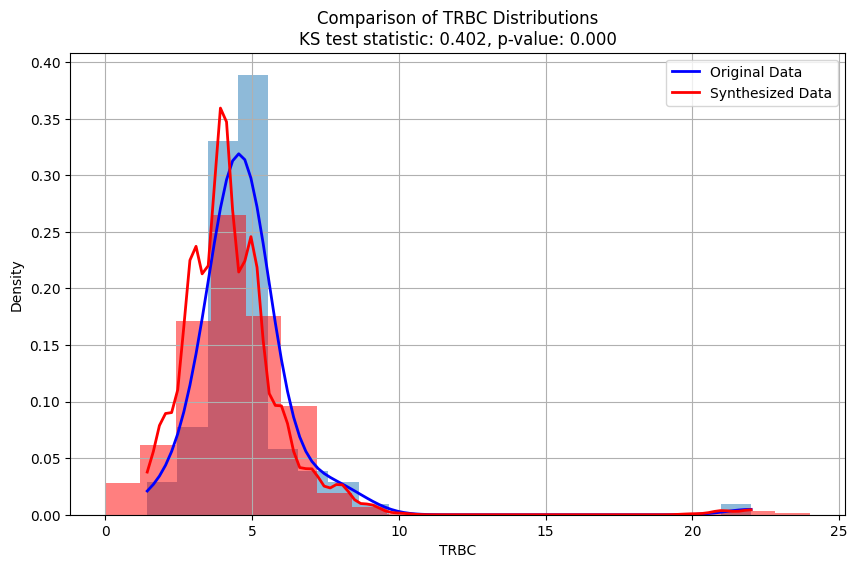

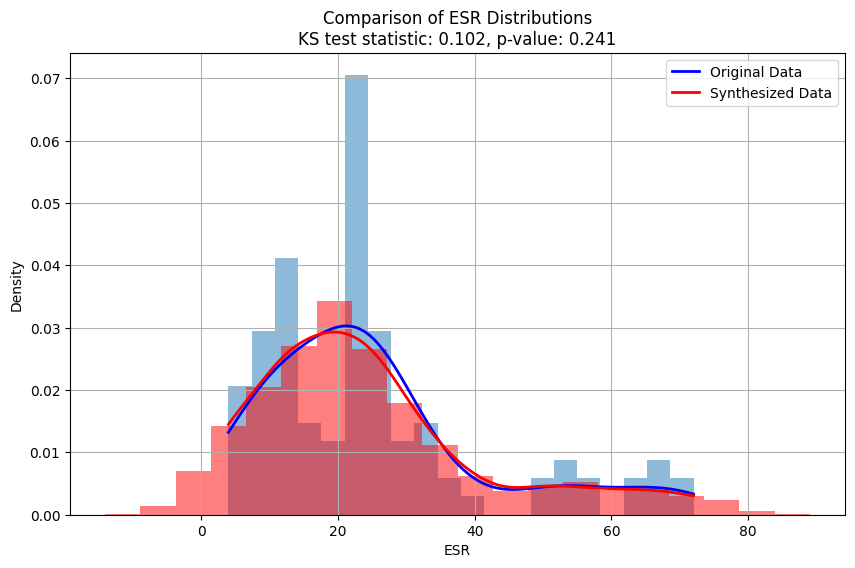

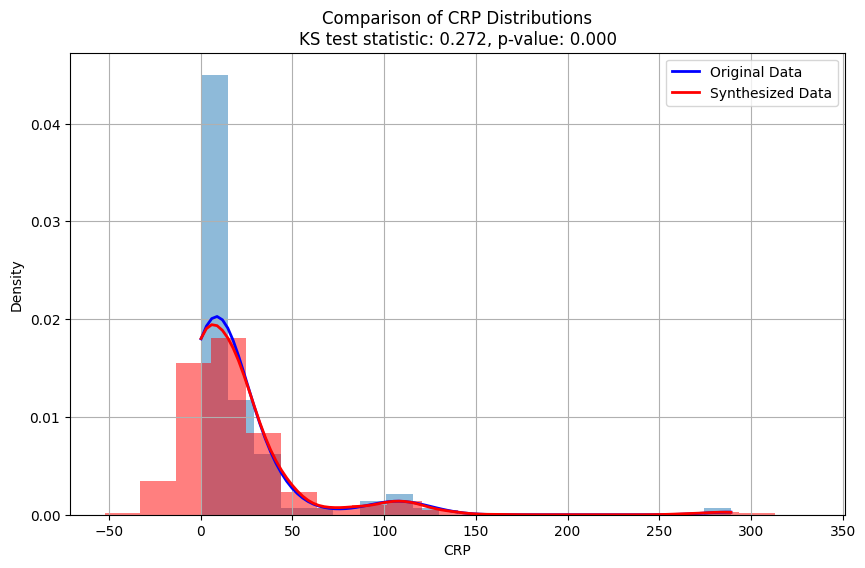

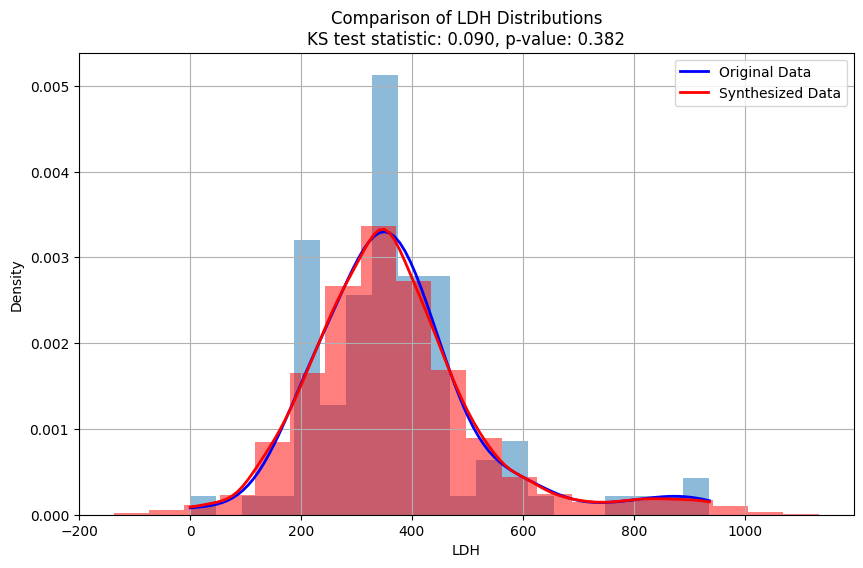

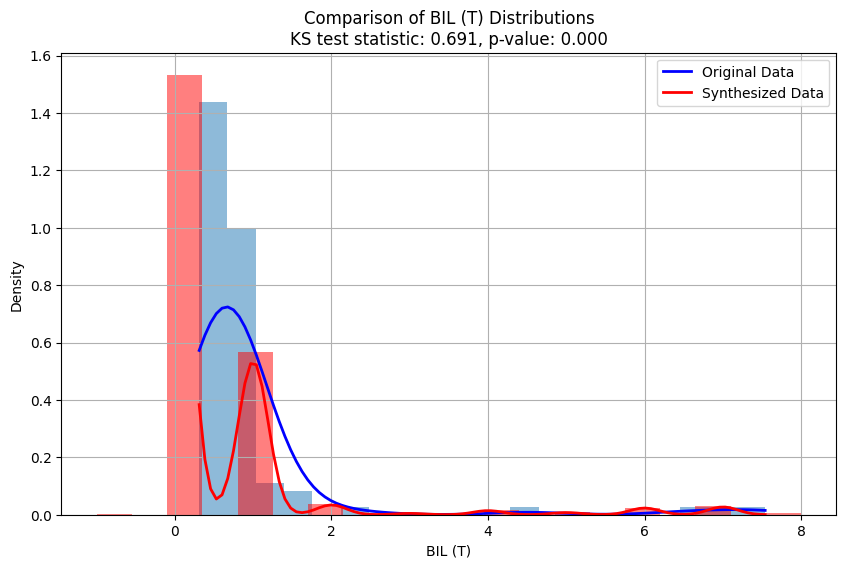

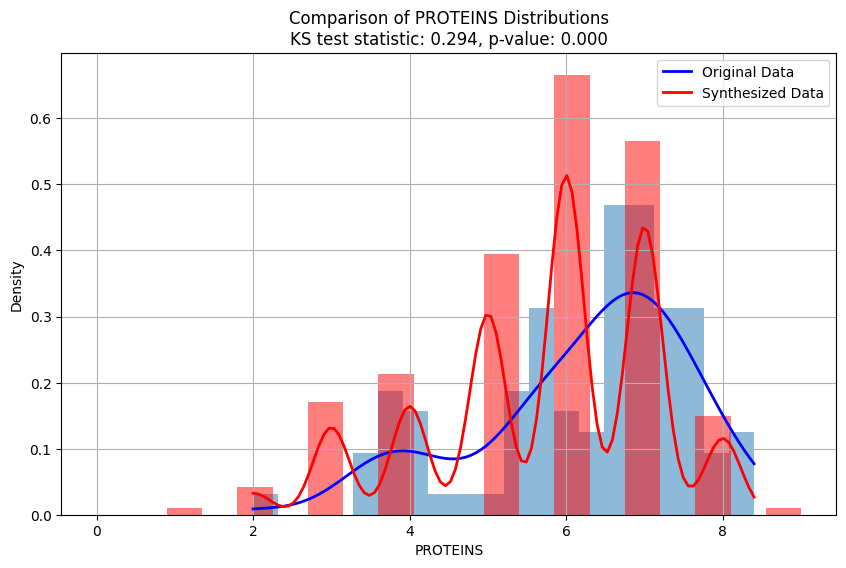

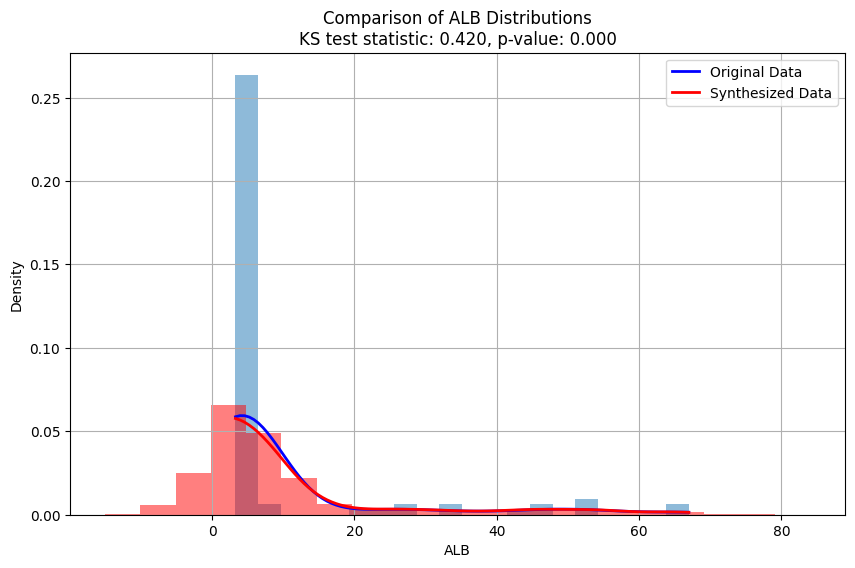

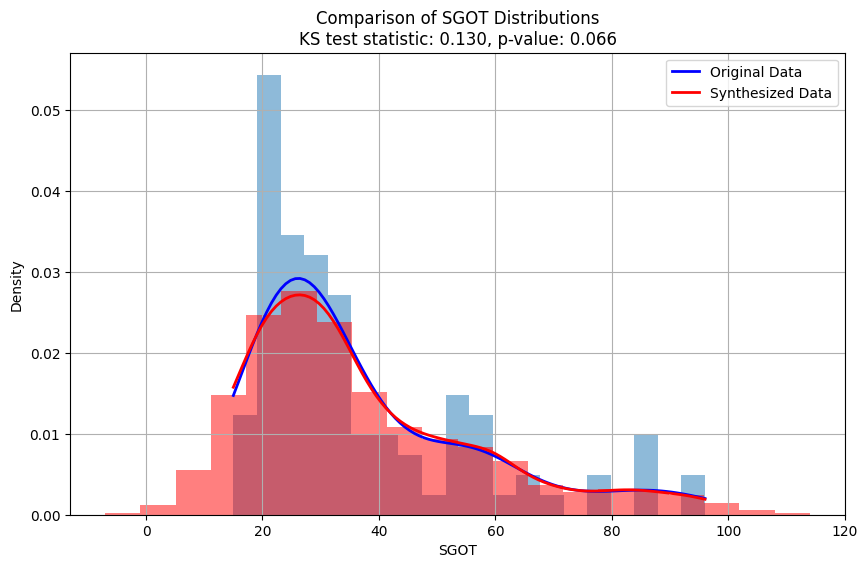

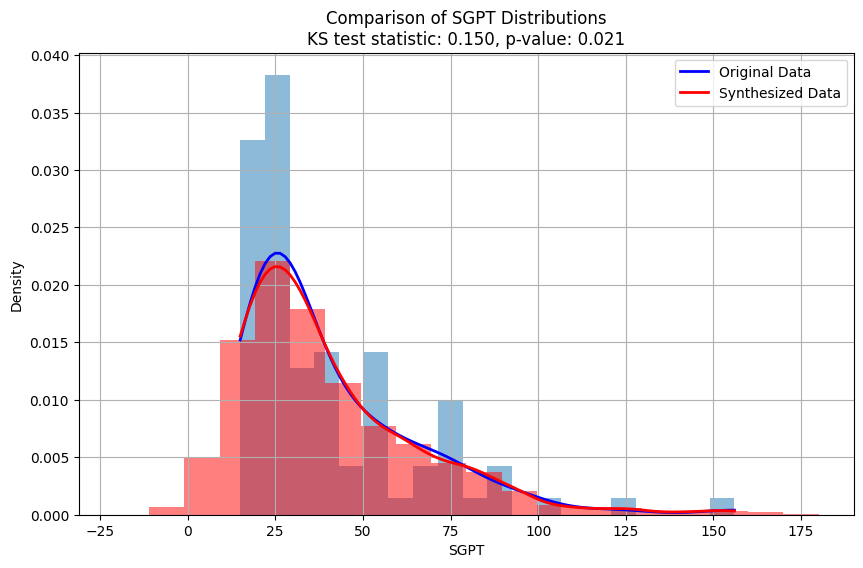

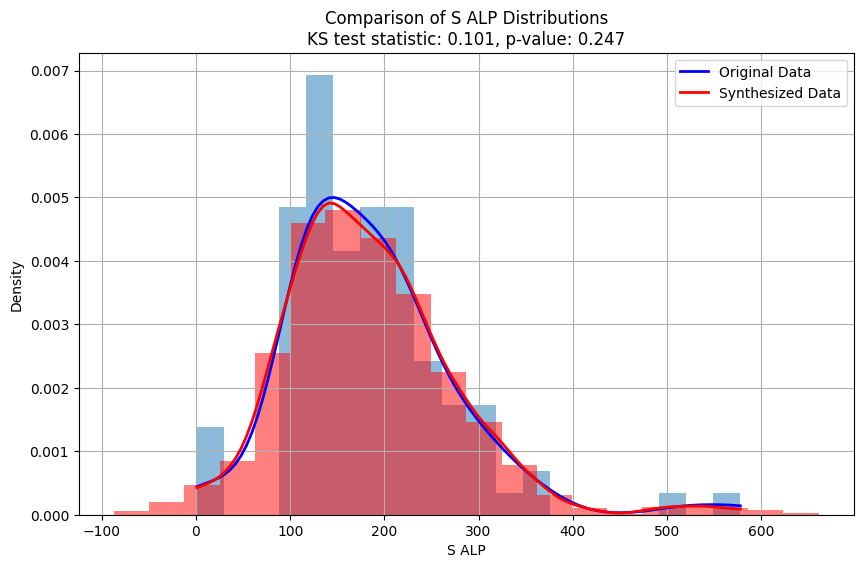

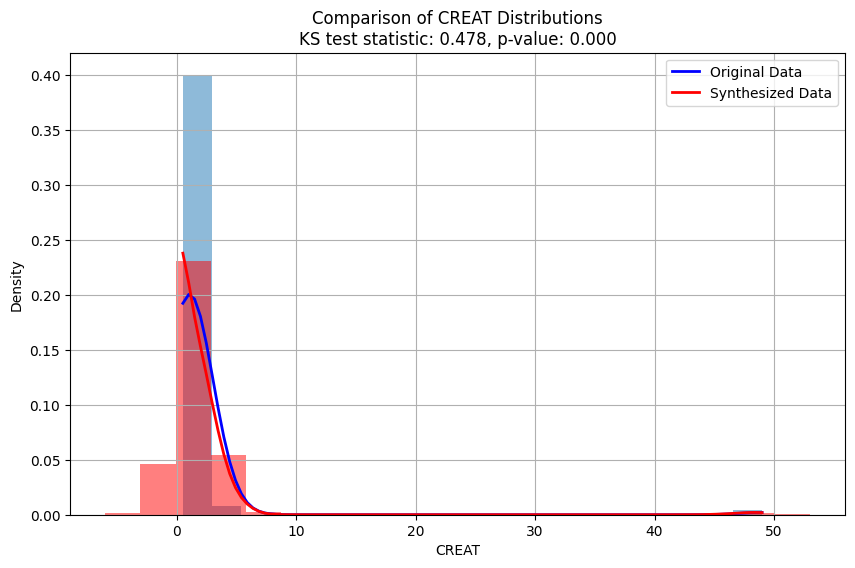

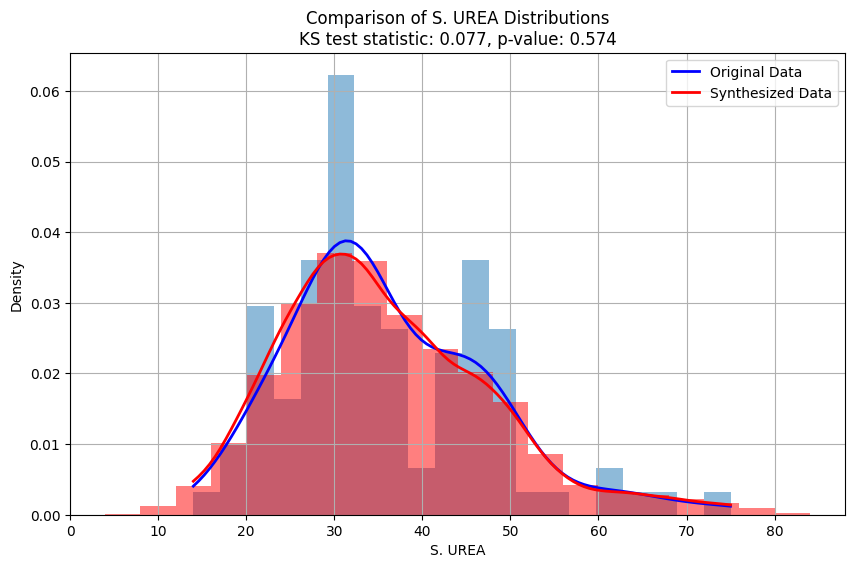

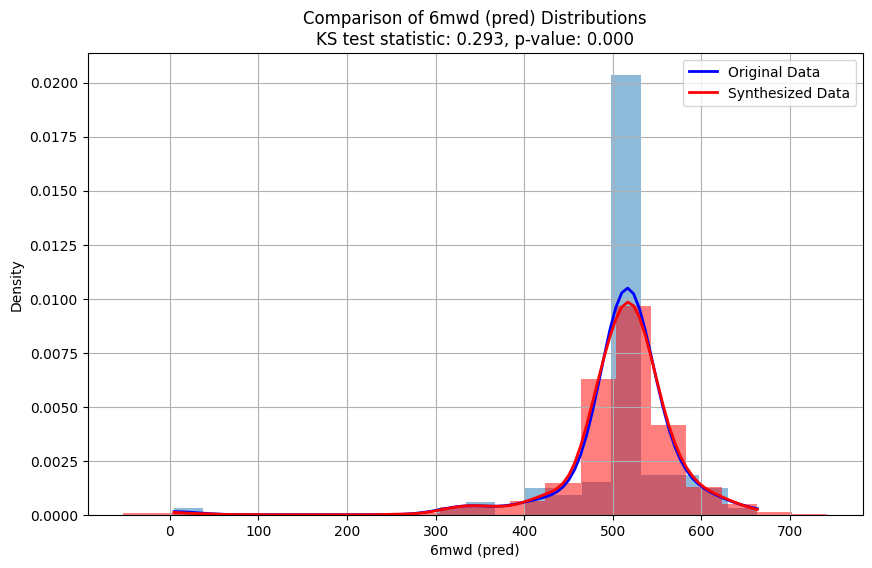

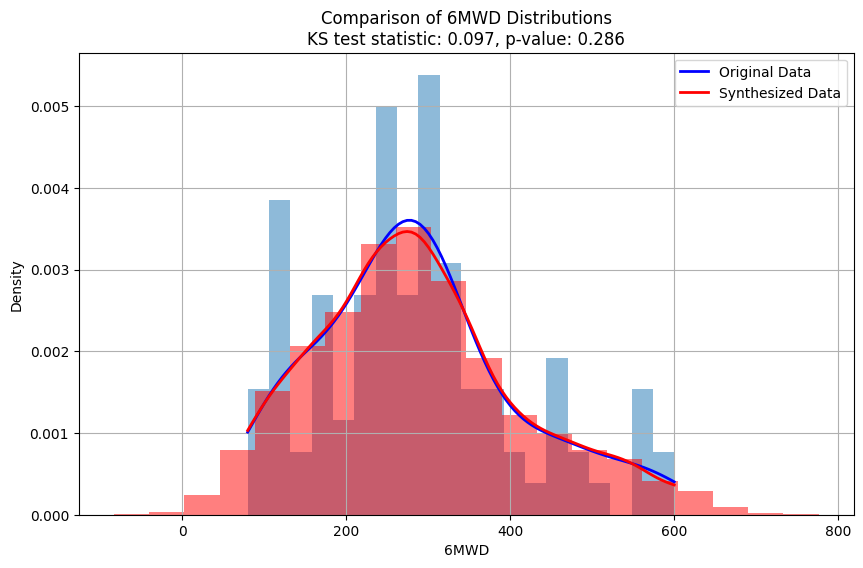

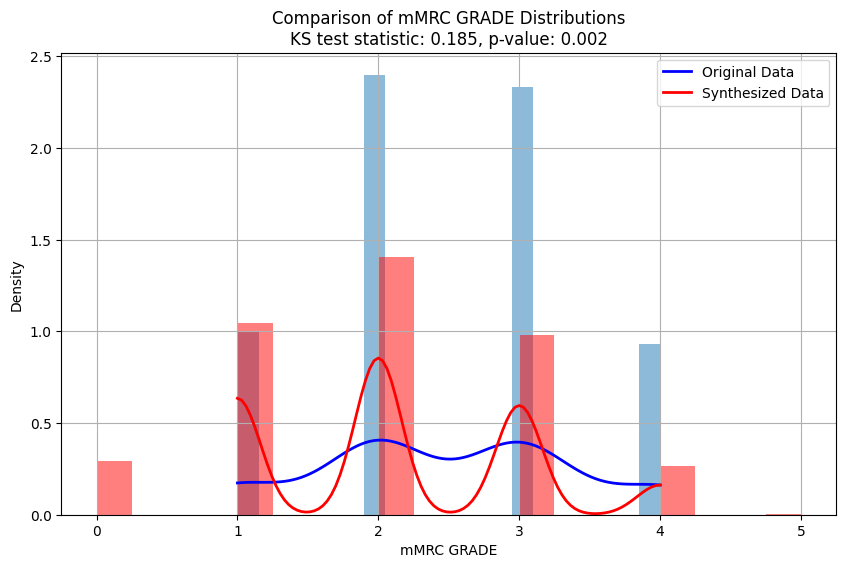

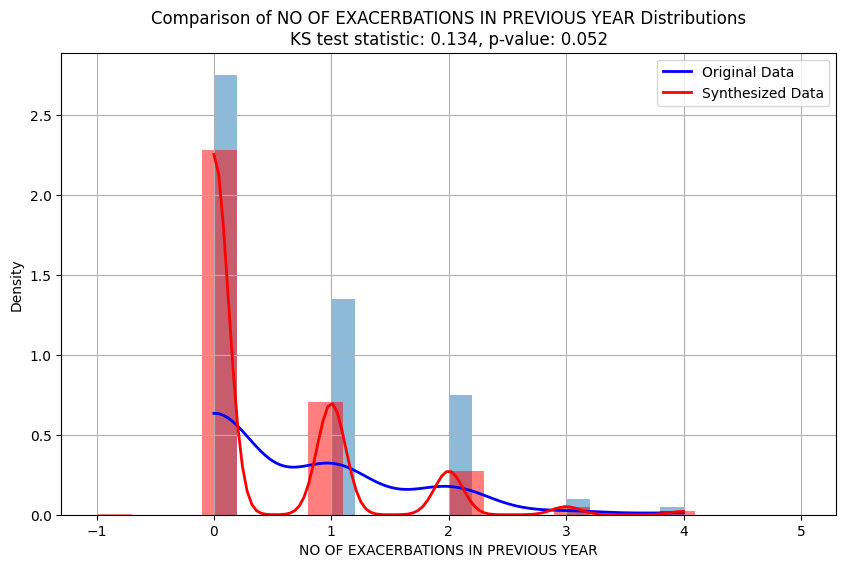

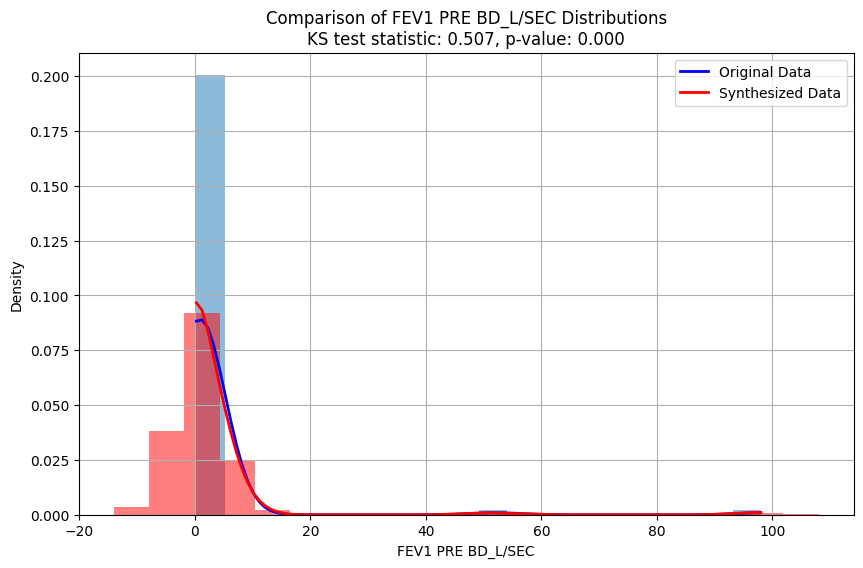

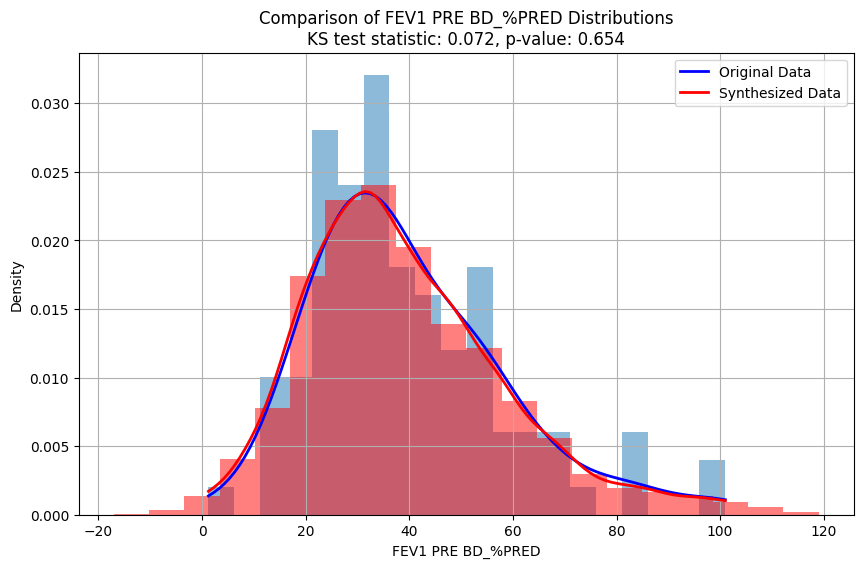

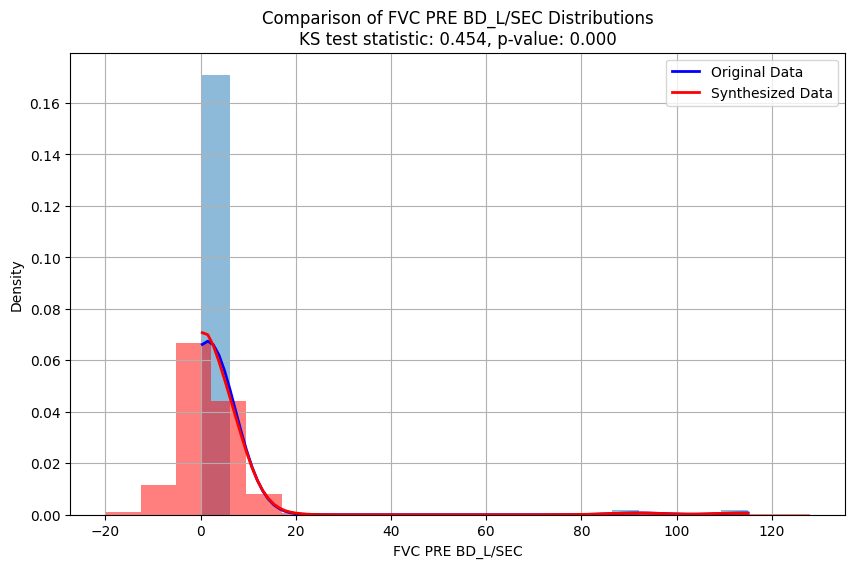

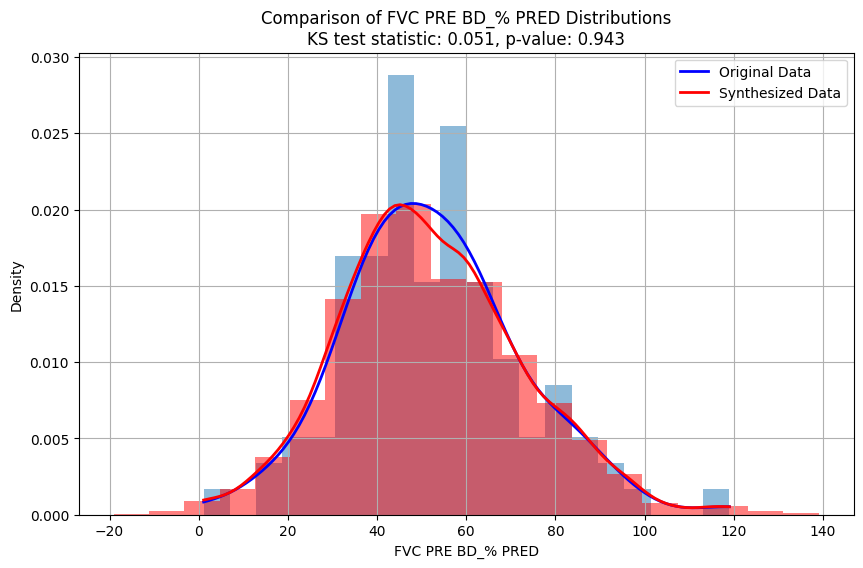

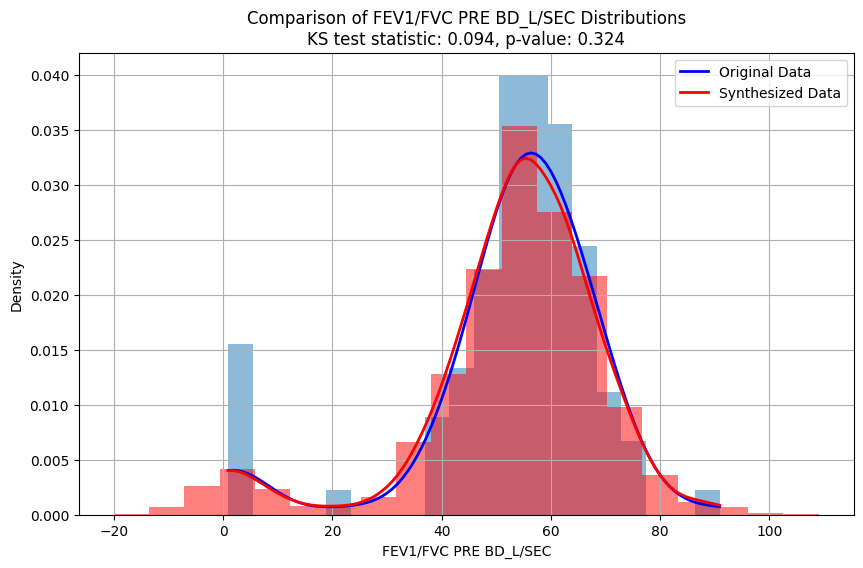

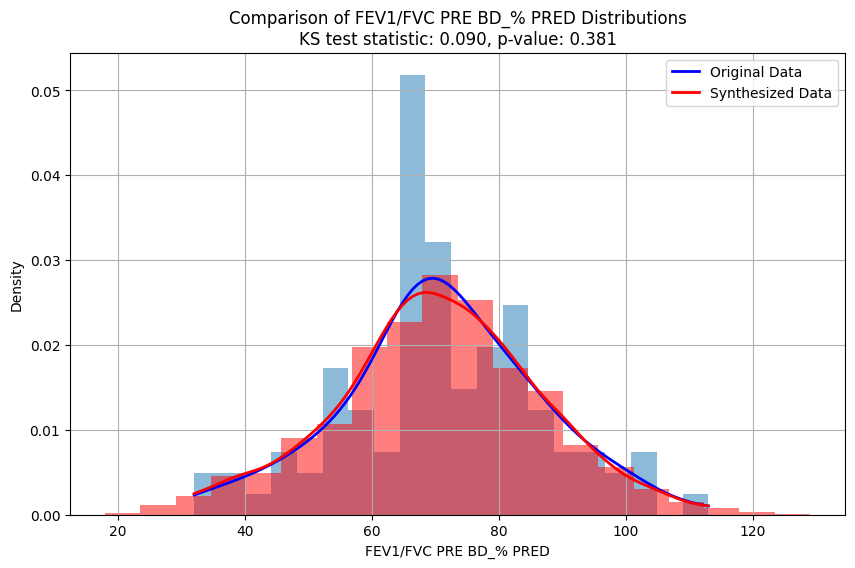

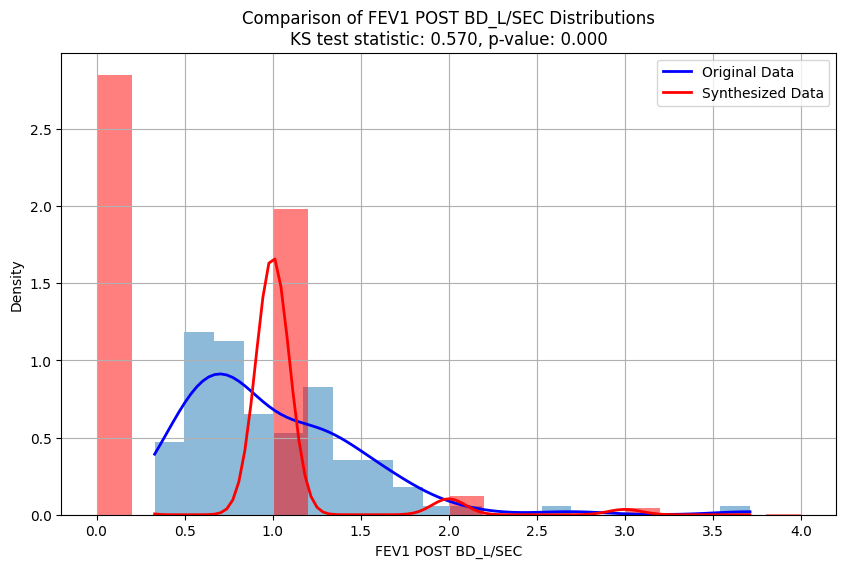

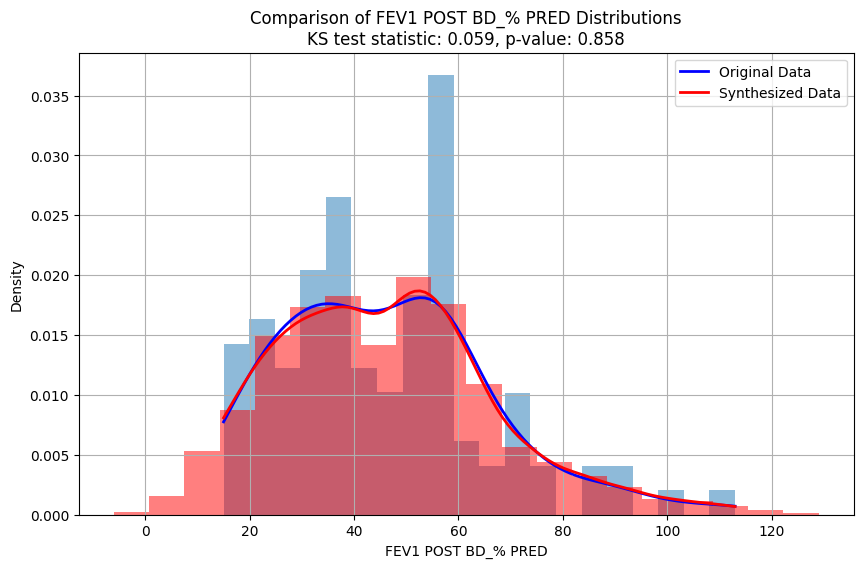

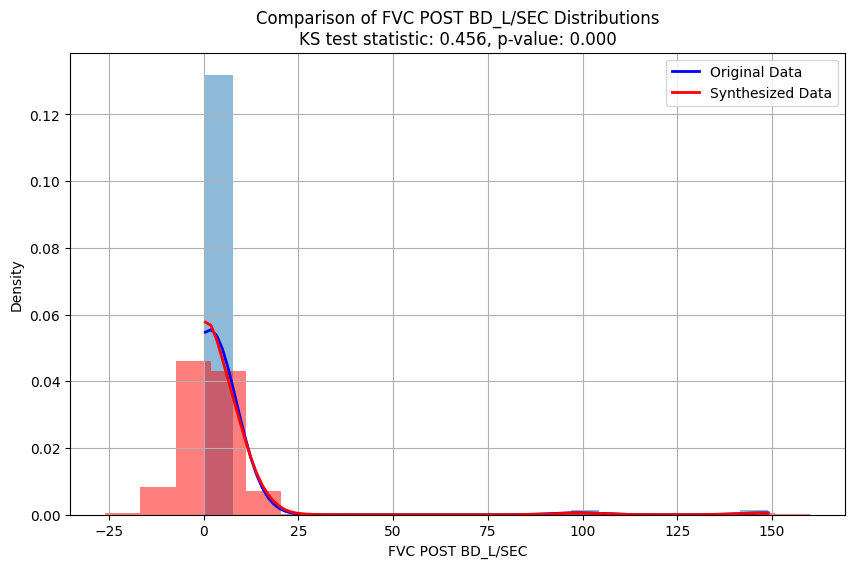

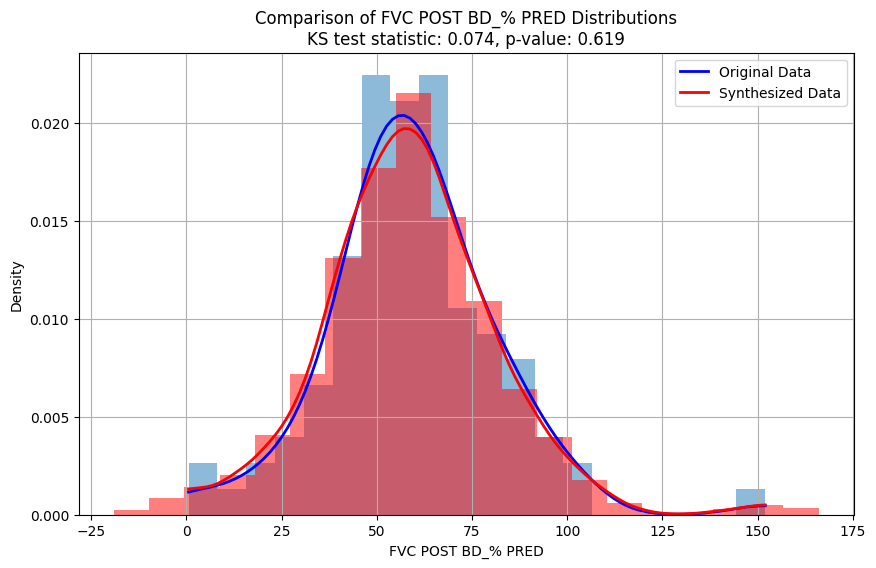

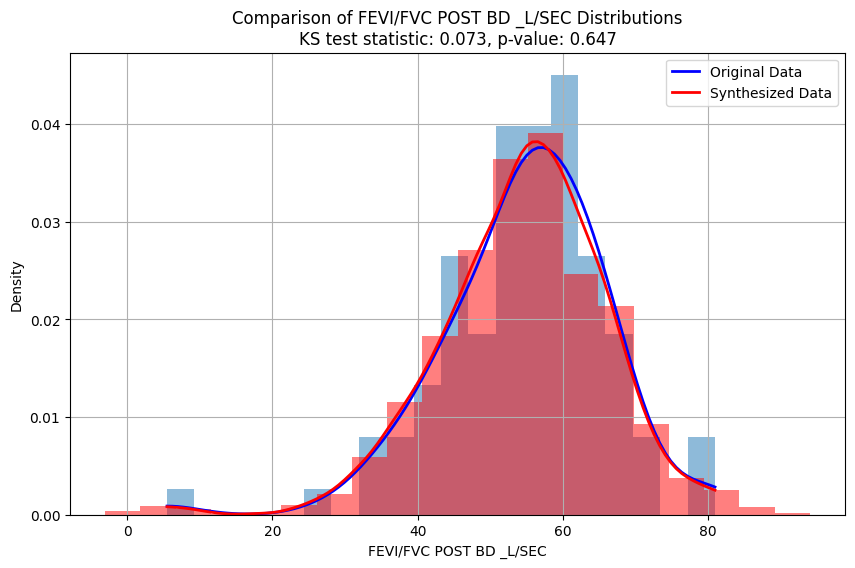

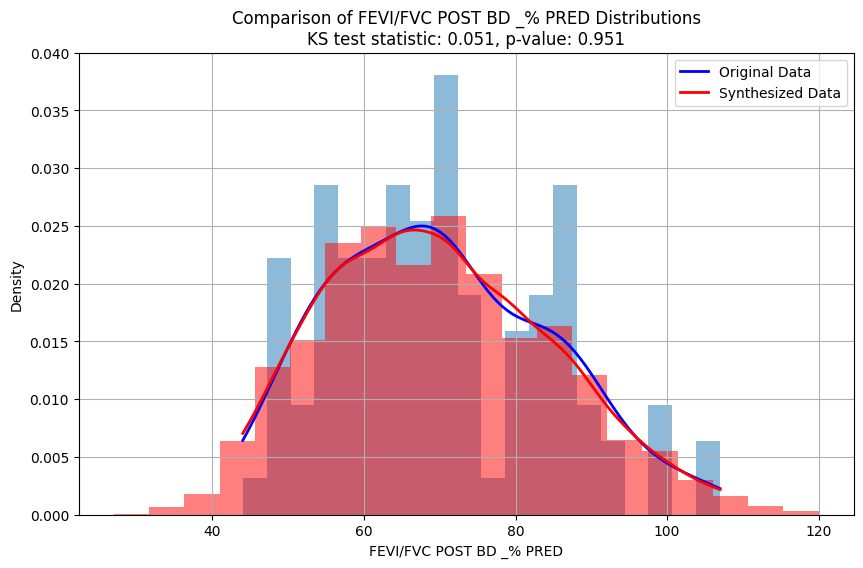

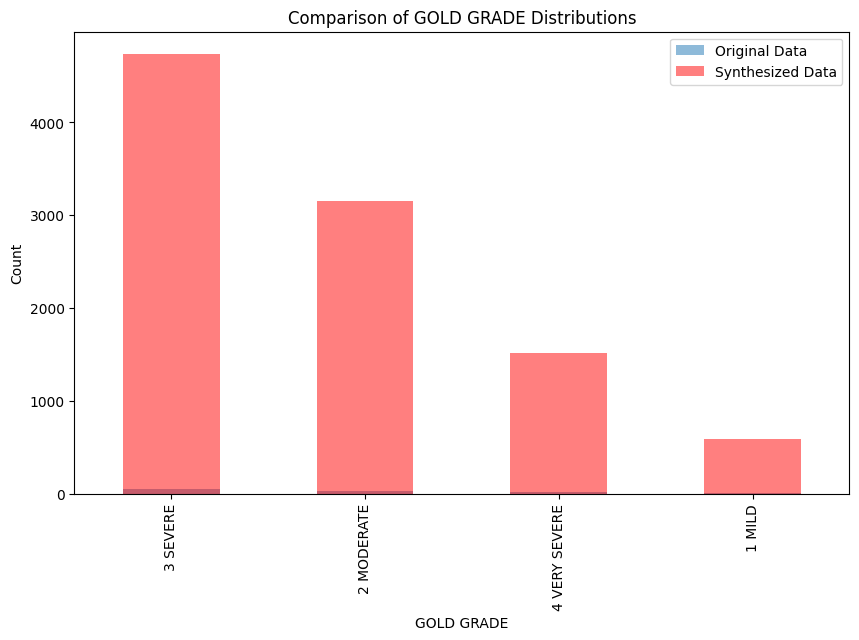

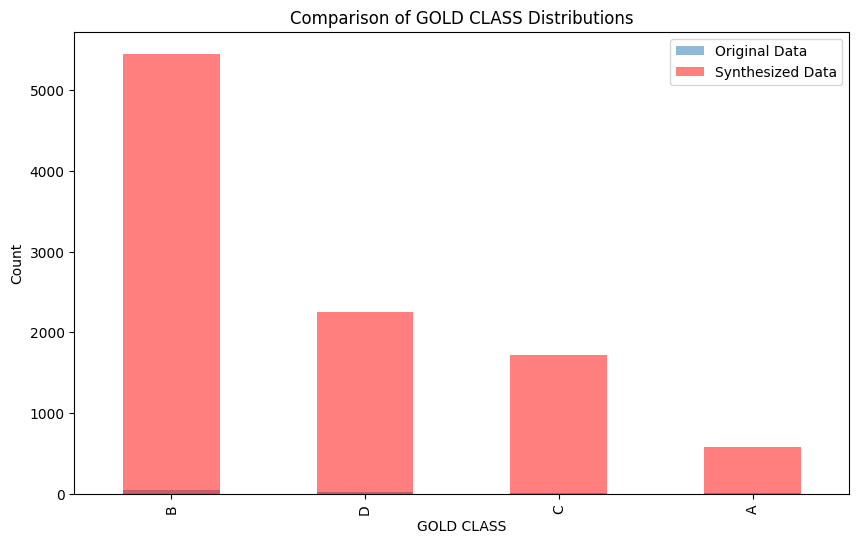

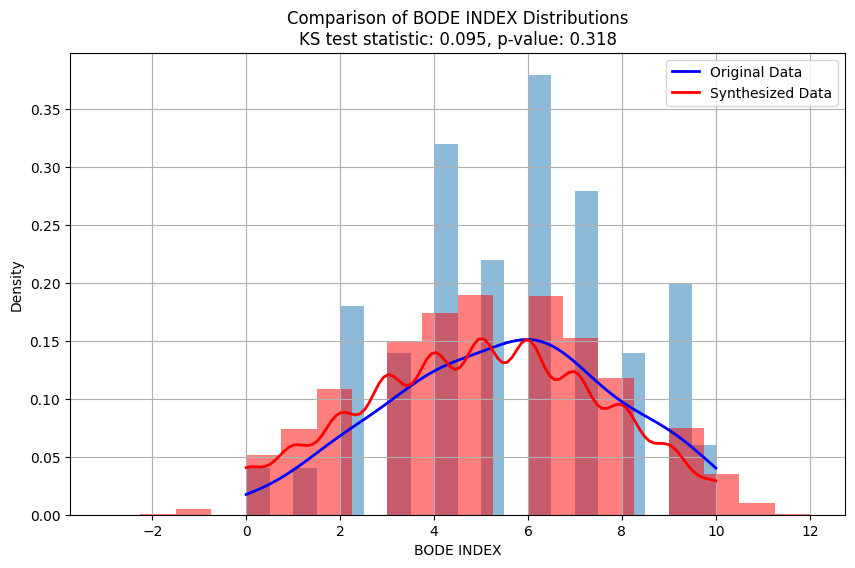

78


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, gaussian_kde

# Load the original medical data
original_data = pd.read_csv("./Data (1).csv")

# Load the synthesized medical data
synthesized_data = pd.read_csv("./synthesized_medical_data.csv")

i=0
# Compare the distributions for each column
for col in original_data.columns:
    # Check the data type of the column
    if original_data[col].dtype == "object":
        i+=1
        # For categorical columns, compare the value counts
        orig_counts = original_data[col].value_counts()
        synth_counts = synthesized_data[col].value_counts()

        fig, ax = plt.subplots(figsize=(10, 6))
        orig_counts.plot(kind="bar", alpha=0.5, ax=ax)
        synth_counts.plot(kind="bar", color="r", alpha=0.5, ax=ax)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"Comparison of {col} Distributions")
        plt.legend(["Original Data", "Synthesized Data"])
        plt.show()
    else:
        i+=1
        # For numerical columns, check for inf or NaN values
        if (
            original_data[col].isin([np.inf, -np.inf, np.nan]).any()
            or synthesized_data[col].isin([np.inf, -np.inf, np.nan]).any()
        ):
            # Replace inf or NaN values with the column median
            original_data[col] = original_data[col].replace(
                [np.inf, -np.inf, np.nan], original_data[col].median()
            )
            synthesized_data[col] = synthesized_data[col].replace(
                [np.inf, -np.inf, np.nan], synthesized_data[col].median()
            )

        # Compare the distributions using KS test and distribution lines
        ks_stat, ks_pvalue = ks_2samp(original_data[col], synthesized_data[col])

        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the histograms
        original_data[col].hist(bins=20, alpha=0.5, ax=ax, density=True)
        synthesized_data[col].hist(bins=20, color="r", alpha=0.5, ax=ax, density=True)

        # Add the distribution lines
        orig_kde = gaussian_kde(original_data[col])
        synth_kde = gaussian_kde(synthesized_data[col])
        x = np.linspace(original_data[col].min(), original_data[col].max(), 100)
        ax.plot(x, orig_kde(x), color="blue", linewidth=2)
        ax.plot(x, synth_kde(x), color="red", linewidth=2)

        plt.xlabel(col)
        plt.ylabel("Density")
        plt.title(
            f"Comparison of {col} Distributions\nKS test statistic: {ks_stat:.3f}, p-value: {ks_pvalue:.3f}"
        )
        plt.legend(["Original Data", "Synthesized Data"])
        plt.show()

print(i)

# Checking the New dataset

In [2]:
df = pd.read_csv("./synthesized_medical_data.csv")
df

S. NO.                 NAME  AGE   SEX MARITAL STATUS  OCCUPATION   
0         60     Abdul Qayum Khan   57  Male        married      farmer  \
1         94      Madan Lal Yadav   44  Male        married      Tailor   
2          3            Ram Murti   55  Male        married   housewife   
3         45  Krishna Kumar Gupta   47  Male        married  unemployed   
4         54               Guddu    44  Male        married      farmer   
...      ...                  ...  ...   ...            ...         ...   
9995      38          Hari Kishan   42  Male        married      farmer   
9996      32              Chidana   50  Male        married      farmer   
9997       0             Hoob Raj   51  Male        married      farmer   
9998      97            Sidhgopal   56  Male        married  unemployed   
9999      32         Shiv Narayan   47  Male        married  shopkeeper   

               EDUCATION AREA OF RESIDENCE  WEIGHT IN KGS  HEIGHT IN CM  ...   
0         Middle school              Rural             27           173  ...  \
1     High School                    Rural             65           155  ...   
2     High School                    Rural             33           161  ...   
3         Middle school              Urban             44           168  ...   
4     High School                    Urban             48           160  ...   
...                  ...               ...            ...           ...  ...   
9995  High School                    Rural             54           156  ...   
9996          illiterate             Urban             46           165  ...   
9997          illiterate             Urban             42           155  ...   
9998  High School                    Urban             47           164  ...   
9999          illiterate             Rural             51           160  ...   

      FEV1/FVC PRE BD_% PRED FEV1 POST BD_L/SEC  FEV1 POST BD_% PRED   
0                         74                  0                   52  \
1                         78                  1                   50   
2                         83                  1                   33   
3                         69                  0                   54   
4                         68                  1                    9   
...                      ...                ...                  ...   
9995                      91                  1                   65   
9996                      94                  1                   17   
9997                      64                  0                   57   
9998                      68                  0                   99   
9999                      61                  1                   24   

     FVC POST BD_L/SEC  FVC POST BD_% PRED FEVI/FVC POST BD _L/SEC   
0                    2                  66                      48  \
1                  -15                  65                      46   
2                   13                  51                      50   
3                    7                  43                      49   
4                  -17                  42                      68   
...                ...                 ...                     ...   
9995                19                  71                      39   
9996                -4                  73                      66   
9997                94                  32                      48   
9998                 0                  49                      59   
9999               -13                  63                      10   

      FEVI/FVC POST BD _% PRED     GOLD GRADE  GOLD CLASS BODE INDEX  
0                           49       3 SEVERE           D          2  
1                           82     2 MODERATE           A          6  
2                           82  4 VERY SEVERE           B          8  
3                           73  4 VERY SEVERE           B          6  
4                           69         1 MILD           B          2  
...         

In [3]:
df.shape

(10000, 78)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 78 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   S. NO.                                                    10000 non-null  int64 
 1   NAME                                                      10000 non-null  object
 2   AGE                                                       10000 non-null  int64 
 3   SEX                                                       10000 non-null  object
 4   MARITAL STATUS                                            10000 non-null  object
 5   OCCUPATION                                                10000 non-null  object
 6   EDUCATION                                                 10000 non-null  object
 7   AREA OF RESIDENCE                                         10000 non-null  object
 8   WEIGHT IN KGS              

In [5]:
df.describe()

S. NO.           AGE  WEIGHT IN KGS  HEIGHT IN CM           BMI   
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000  \
mean      50.079200     60.378400      53.407500    160.518400     20.394800   
std       31.205812     10.741301      13.689448      9.088978      4.835294   
min      -31.000000     27.000000      15.000000    129.000000      7.000000   
25%       25.000000     53.000000      43.000000    155.000000     17.000000   
50%       50.000000     60.000000      53.000000    161.000000     20.000000   
75%       75.000000     67.000000      63.000000    166.000000     23.000000   
max      128.000000     97.000000     104.000000    194.000000     39.000000   

       SHORTNESS OF BREATH_DURATION  COUGH_DURATION  EXPECTORATION_DURATION   
count                  10000.000000    10000.000000            10000.000000  \
mean                      15.209000       12.731500               10.742900   
std                       21.809101       11.503366                8.375823   
min                      -29.000000      -16.000000              -11.000000   
25%                        5.000000        5.000000                5.000000   
50%                       12.000000       11.000000               10.000000   
75%                       20.000000       17.000000               15.000000   
max                      197.000000       75.000000               44.000000   

       CHEST TIGTNESS_DURATION  CHEST PAIN_DURATION  ...  FVC PRE BD_% PRED   
count             10000.000000         10000.000000  ...       10000.000000  \
mean                  0.344400             0.494700  ...          52.118600   
std                   1.990624             4.890579  ...          21.043375   
min                  -3.000000            -7.000000  ...         -19.000000   
25%                   0.000000            -1.000000  ...          38.000000   
50%                   0.000000             0.000000  ...          50.000000   
75%                   0.000000             1.000000  ...          65.000000   
max                  16.000000            52.000000  ...         139.000000   

       FEV1/FVC PRE BD_L/SEC  FEV1/FVC PRE BD_% PRED  FEV1 POST BD_L/SEC   
count           10000.000000            10000.000000        10000.000000  \
mean               52.464000               70.525500            0.473000   
std                17.926668               16.463446            0.596747   
min               -20.000000               18.000000            0.000000   
25%                47.000000               61.000000            0.000000   
50%                55.000000               71.000000            0.000000   
75%                63.000000               81.000000            1.000000   
max               109.000000              129.000000            4.000000   

       FEV1 POST BD_% PRED  FVC POST BD_L/SEC  FVC POST BD_% PRED   
count         10000.000000        10000.00000         10000.00000  \
mean             45.961500            3.83330            58.56680   
std              21.347252           18.00177            23.82344   
min              -6.000000          -26.00000           -19.00000   
25%              30.000000           -2.00000            44.00000   
50%              45.000000            1.00000            58.00000   
75%              59.000000            6.00000            72.00000   
max             129.000000          160.00000           166.00000   

       FEVI/FVC POST BD _L/SEC  FEVI/FVC POST BD _% PRED    BODE INDEX  
count             10000.000000              10000.000000  10000.000000  
mean                 54.522400                 69.741800      5.002400  
std                  11.987621                 15.409136      2.563445  
min                  -3.000000                 27.000000     -3.000000  
25%                  48.000000                 58.000000      3.000000  
50%                  55.000000                 69.000000      5.000000  
75%                  62.000000                 80.

In [10]:
columns_to_drop = [
    "S. NO.",
    "NAME",
    "MARITAL STATUS",
    "OCCUPATION",
    "EDUCATION",
    "AREA OF RESIDENCE",
]
df.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
df

AGE   SEX  WEIGHT IN KGS  HEIGHT IN CM  BMI SHORTNESS OF BREATH   
0      57  Male             27           173   23                 YES  \
1      44  Male             65           155   18                 YES   
2      55  Male             33           161   24                 YES   
3      47  Male             44           168   28                 YES   
4      44  Male             48           160   23                 YES   
...   ...   ...            ...           ...  ...                 ...   
9995   42  Male             54           156   28                 YES   
9996   50  Male             46           165   13                 YES   
9997   51  Male             42           155   13                 YES   
9998   56  Male             47           164   21                 YES   
9999   47  Male             51           160   23                 YES   

      SHORTNESS OF BREATH_DURATION COUGH  COUGH_DURATION EXPECTORATION  ...   
0                               11   YES              17           YES  ...  \
1                                3   YES               4           YES  ...   
2                               18   YES               7           YES  ...   
3                               10   YES              16           YES  ...   
4                              186   YES               4           YES  ...   
...                            ...   ...             ...           ...  ...   
9995                            29   YES               5           YES  ...   
9996                             4   YES               0           YES  ...   
9997                            34   YES              10           YES  ...   
9998                            12   YES              13           YES  ...   
9999                            27   YES               6           YES  ...   

      FEV1/FVC PRE BD_% PRED FEV1 POST BD_L/SEC  FEV1 POST BD_% PRED   
0                         74                  0                   52  \
1                         78                  1                   50   
2                         83                  1                   33   
3                         69                  0                   54   
4                         68                  1                    9   
...                      ...                ...                  ...   
9995                      91                  1                   65   
9996                      94                  1                   17   
9997                      64                  0                   57   
9998                      68                  0                   99   
9999                      61                  1                   24   

     FVC POST BD_L/SEC FVC POST BD_% PRED FEVI/FVC POST BD _L/SEC   
0                    2                 66                      48  \
1                  -15                 65                      46   
2                   13                 51                      50   
3                    7                 43                      49   
4                  -17                 42                      68   
...                ...                ...                     ...   
9995                19                 71                      39   
9996                -4                 73                      66   
9997                94                 32                      48   
9998                 0                 49                      59   
9999               -13                 63                      10   

      FEVI/FVC POST BD _% PRED     GOLD GRADE GOLD CLASS BODE INDEX  
0                           49       3 SEVERE          D          2  
1                           82     2 MODERATE          A          6  
2                           82  4 VERY SEVERE          B          8  
3                           73  4 VERY SEVERE          B          6  
4                           69         1 MILD          B          2  
...                        ...            ...        ...        ..

In [12]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [14]:
df["FEVER_DURATION"] = df["FEVER_DURATION"].str.replace(" days", "").astype(float)
df["FEVER_DURATION"]

0       0.0
1       0.0
2       0.0
3       0.5
4       5.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: FEVER_DURATION, Length: 10000, dtype: float64

In [18]:
df["TLC "] = df["TLC "].str.replace(",", "").astype(float)

In [19]:
categorical_count = 0
numeric_count = 0

for col in df.dtypes.index:
    if df.dtypes[col] == "object":
        categorical_count += 1
    else:
        numeric_count += 1

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numeric variables: {numeric_count}")

Number of categorical variables: 29
Number of numeric variables: 43


In [20]:
duplicates = df.duplicated()
duplicates.sum()

0

In [21]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count != 0:
        print(f"Column '{column}' has {null_count} null values.")

In [22]:
df.isna().sum()

AGE                         0
SEX                         0
WEIGHT IN KGS               0
HEIGHT IN CM                0
BMI                         0
                           ..
FEVI/FVC POST BD _L/SEC     0
FEVI/FVC POST BD _% PRED    0
GOLD GRADE                  0
GOLD CLASS                  0
BODE INDEX                  0
Length: 72, dtype: int64

In [26]:
def calculate_6MWD_pred(row):
    if pd.isnull(row["6mwd (pred)"]):  # Check if 6MWD_pred is null
        if row["SEX"] == "Male":
            return round(
                7.57 * row["HEIGHT_IN_CM"]
                - 5.02 * row["AGE"]
                - 1.76 * row["WEIGHT_IN_KGS"]
                - 309
            )
        else:
            return round(
                2.11 * row["HEIGHT_IN_CM"]
                - 2.29 * row["AGE"]
                - 5.78 * row["WEIGHT_IN_KGS"]
                + 667
            )
    else:
        return row["6mwd (pred)"]  # Keep the existing value if not null


# Apply the function to calculate 6MWD_pred only for rows where it's null
df["6mwd (pred)"] = df.apply(calculate_6MWD_pred, axis=1)

In [27]:
null_values = df.isnull().sum()
null_values.sort_values(ascending=False)

AGE                0
SEX                0
S. UREA            0
CREAT              0
S ALP              0
                  ..
STEROID USE        0
KIDNEY DISEASE     0
THYROID DISEASE    0
CVD                0
BODE INDEX         0
Length: 72, dtype: int64

In [28]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
columns_to_remove = ["BODE_INDEX"]
columns_to_remove_set = set(columns_to_remove)

# Remove the columns from the categorical_columns list using set difference
numerical_columns = list(set(numerical_columns) - columns_to_remove_set)
print(numerical_columns)

['FVC PRE BD_L/SEC', 'SGOT', '6mwd (pred)', 'FVC PRE BD_% PRED', 'BMI', 'ALB', 'EXPECTORATION_DURATION', 'FEV1/FVC PRE BD_% PRED', 'CREAT', 'HEIGHT IN CM', 'FEV1 PRE BD_%PRED', 'CHEST PAIN_DURATION', 'SHORTNESS OF BREATH_DURATION', 'TLC ', 'FEV1/FVC PRE BD_L/SEC', 'AGE', 'FVC POST BD_% PRED', 'SMOKING INDEX', 'BODE INDEX', 'FVC POST BD_L/SEC', 'COUGH_DURATION', 'HB', 'S. UREA', 'CRP', 'BIL (T)', 'PLATELET', 'FEV1 PRE BD_L/SEC', 'SGPT', 'FEV1 POST BD_L/SEC', 'LDH', 'FEV1 POST BD_% PRED', 'FEVI/FVC POST BD _L/SEC', 'CHEST TIGTNESS_DURATION', 'TRBC', 'NO OF EXACERBATIONS IN PREVIOUS YEAR', 'PROTEINS', '6MWD', 'S ALP', 'WEIGHT IN KGS', 'FEVER_DURATION', 'ESR', 'FEVI/FVC POST BD _% PRED', 'mMRC GRADE']


In [29]:
categorical_columns = df.select_dtypes(exclude=np.number).columns
categorical_columns
columns_to_remove = ["GOLD_GRADE", "GOLD_CLASS"]
columns_to_remove_set = set(columns_to_remove)
# Remove the columns from the categorical_columns list using set difference
categorical_columns = list(set(categorical_columns) - columns_to_remove_set)
print(categorical_columns)

['KIDNEY DISEASE', 'ICTERUS', 'EXPECTORATION', 'ALCOHOL USE', 'CHEST TIGTNESS', 'HYPERTENSION', 'PALLOR', 'CHEST PAIN', 'NO OF YEARS', 'COUGH', 'SMOKELESS TOBACCO USE', 'GOLD GRADE', 'RAISED JVP', 'FEVER', 'STEROID USE', 'CVD', 'SEX', 'CYANOSIS', 'TYPE OF SMOKER', 'THYROID DISEASE', 'CLUBBING', 'SHORTNESS OF BREATH', 'LYMPHADENOAPTHY', 'PEDAL EDEMA', 'CIGARETTE/BIDI/GANJA/BIOMASS FUEL EXPOSURE IN PACK YEARS', 'GOLD CLASS', 'LUNG CANCER', 'DIABETES ', 'LIVER DISEASE']


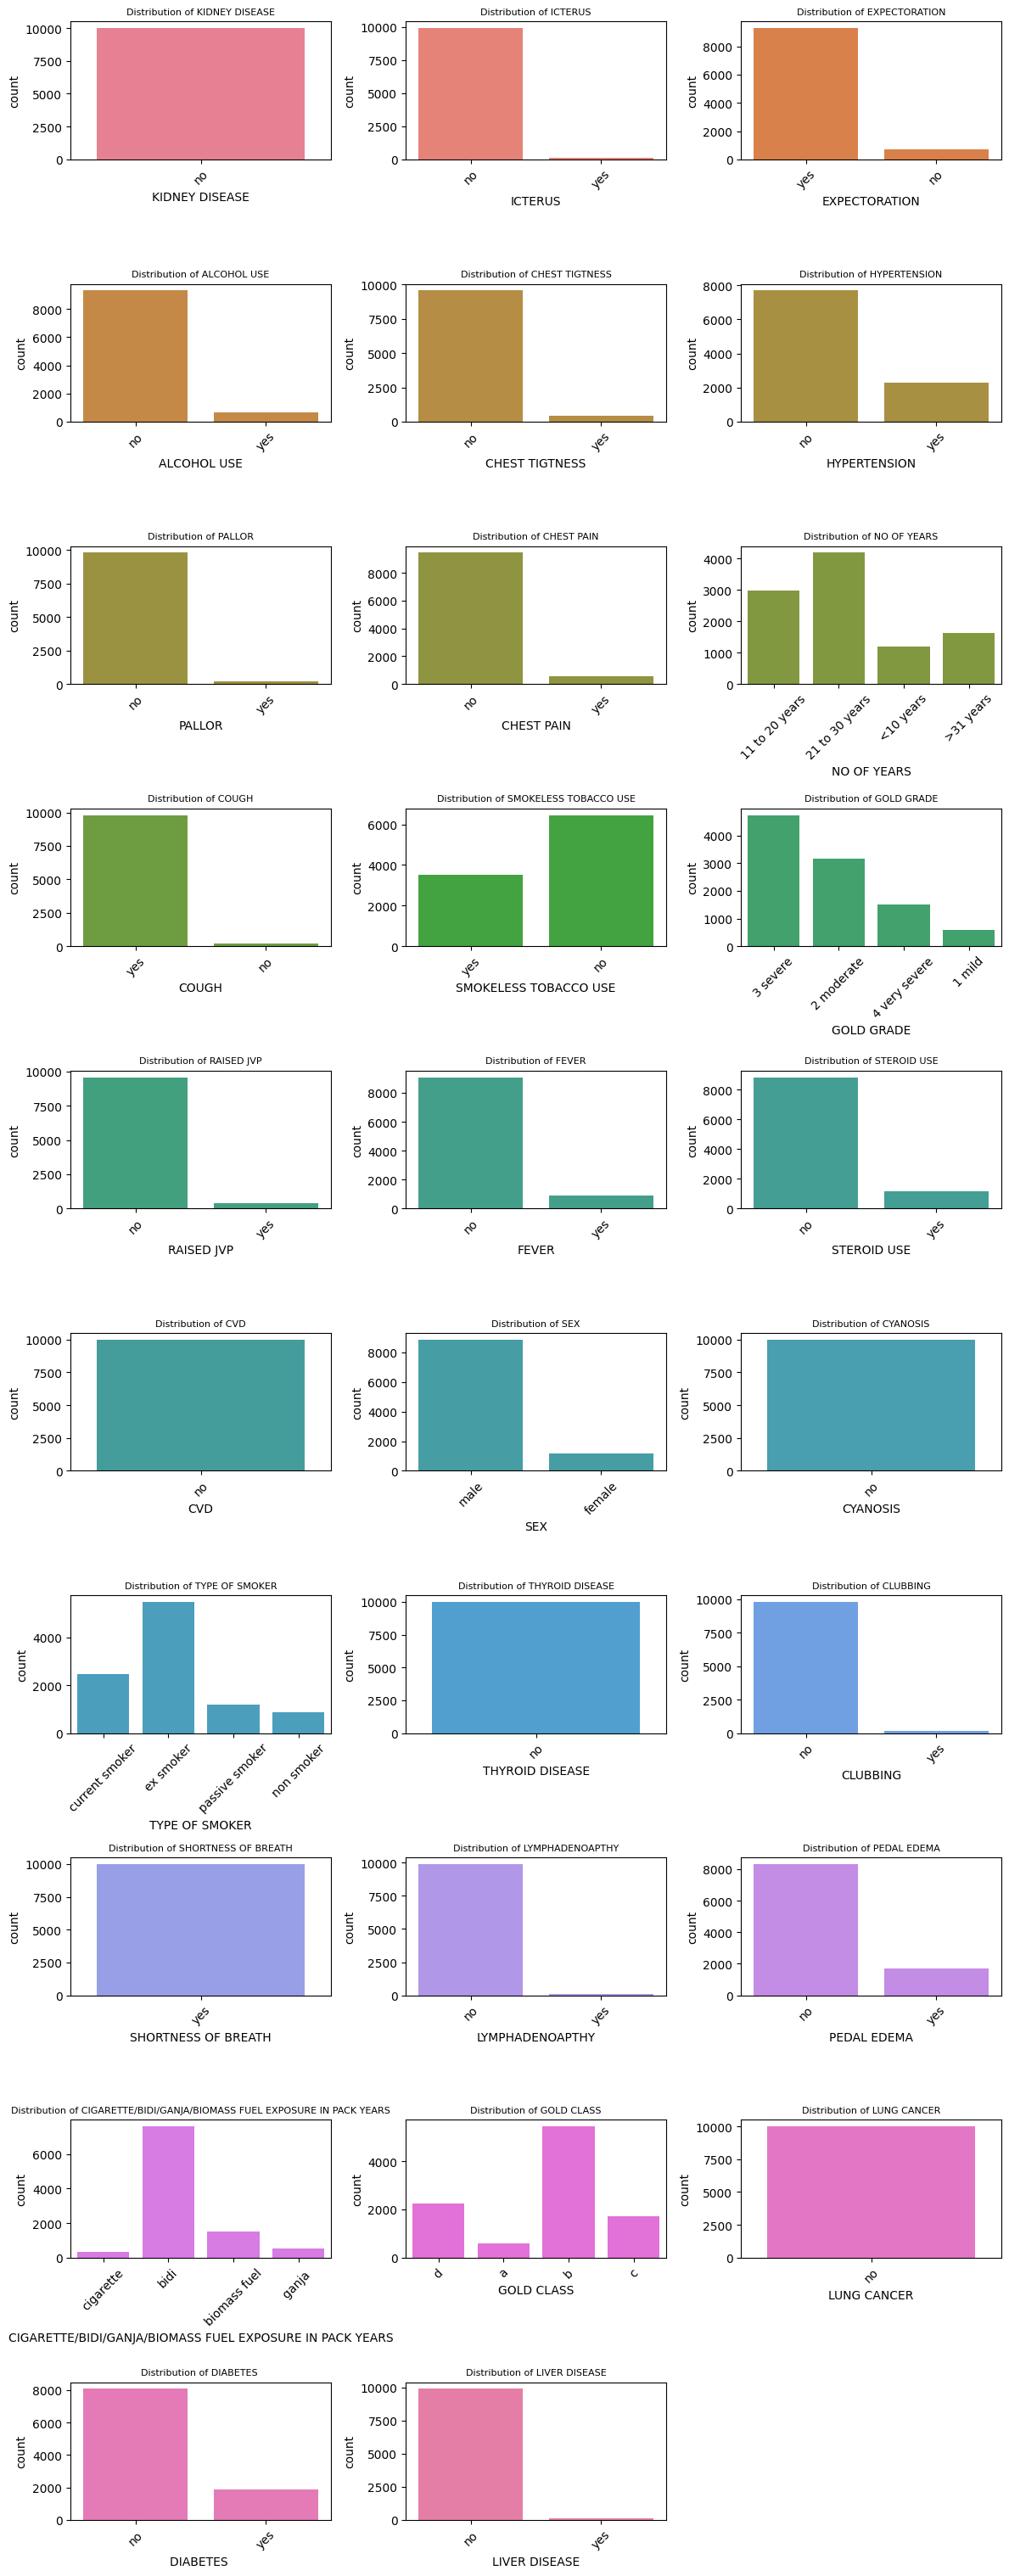

In [30]:
import seaborn as sns

# Bar Plots of all Categorical Columns with their types and counts
colors = sns.color_palette("husl", len(categorical_columns))

num_rows = (len(categorical_columns) // 3) + (len(categorical_columns) % 3)
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f"Distribution of {col}", fontsize=8)
    axes[i].tick_params(axis="x", rotation=45)

for j in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

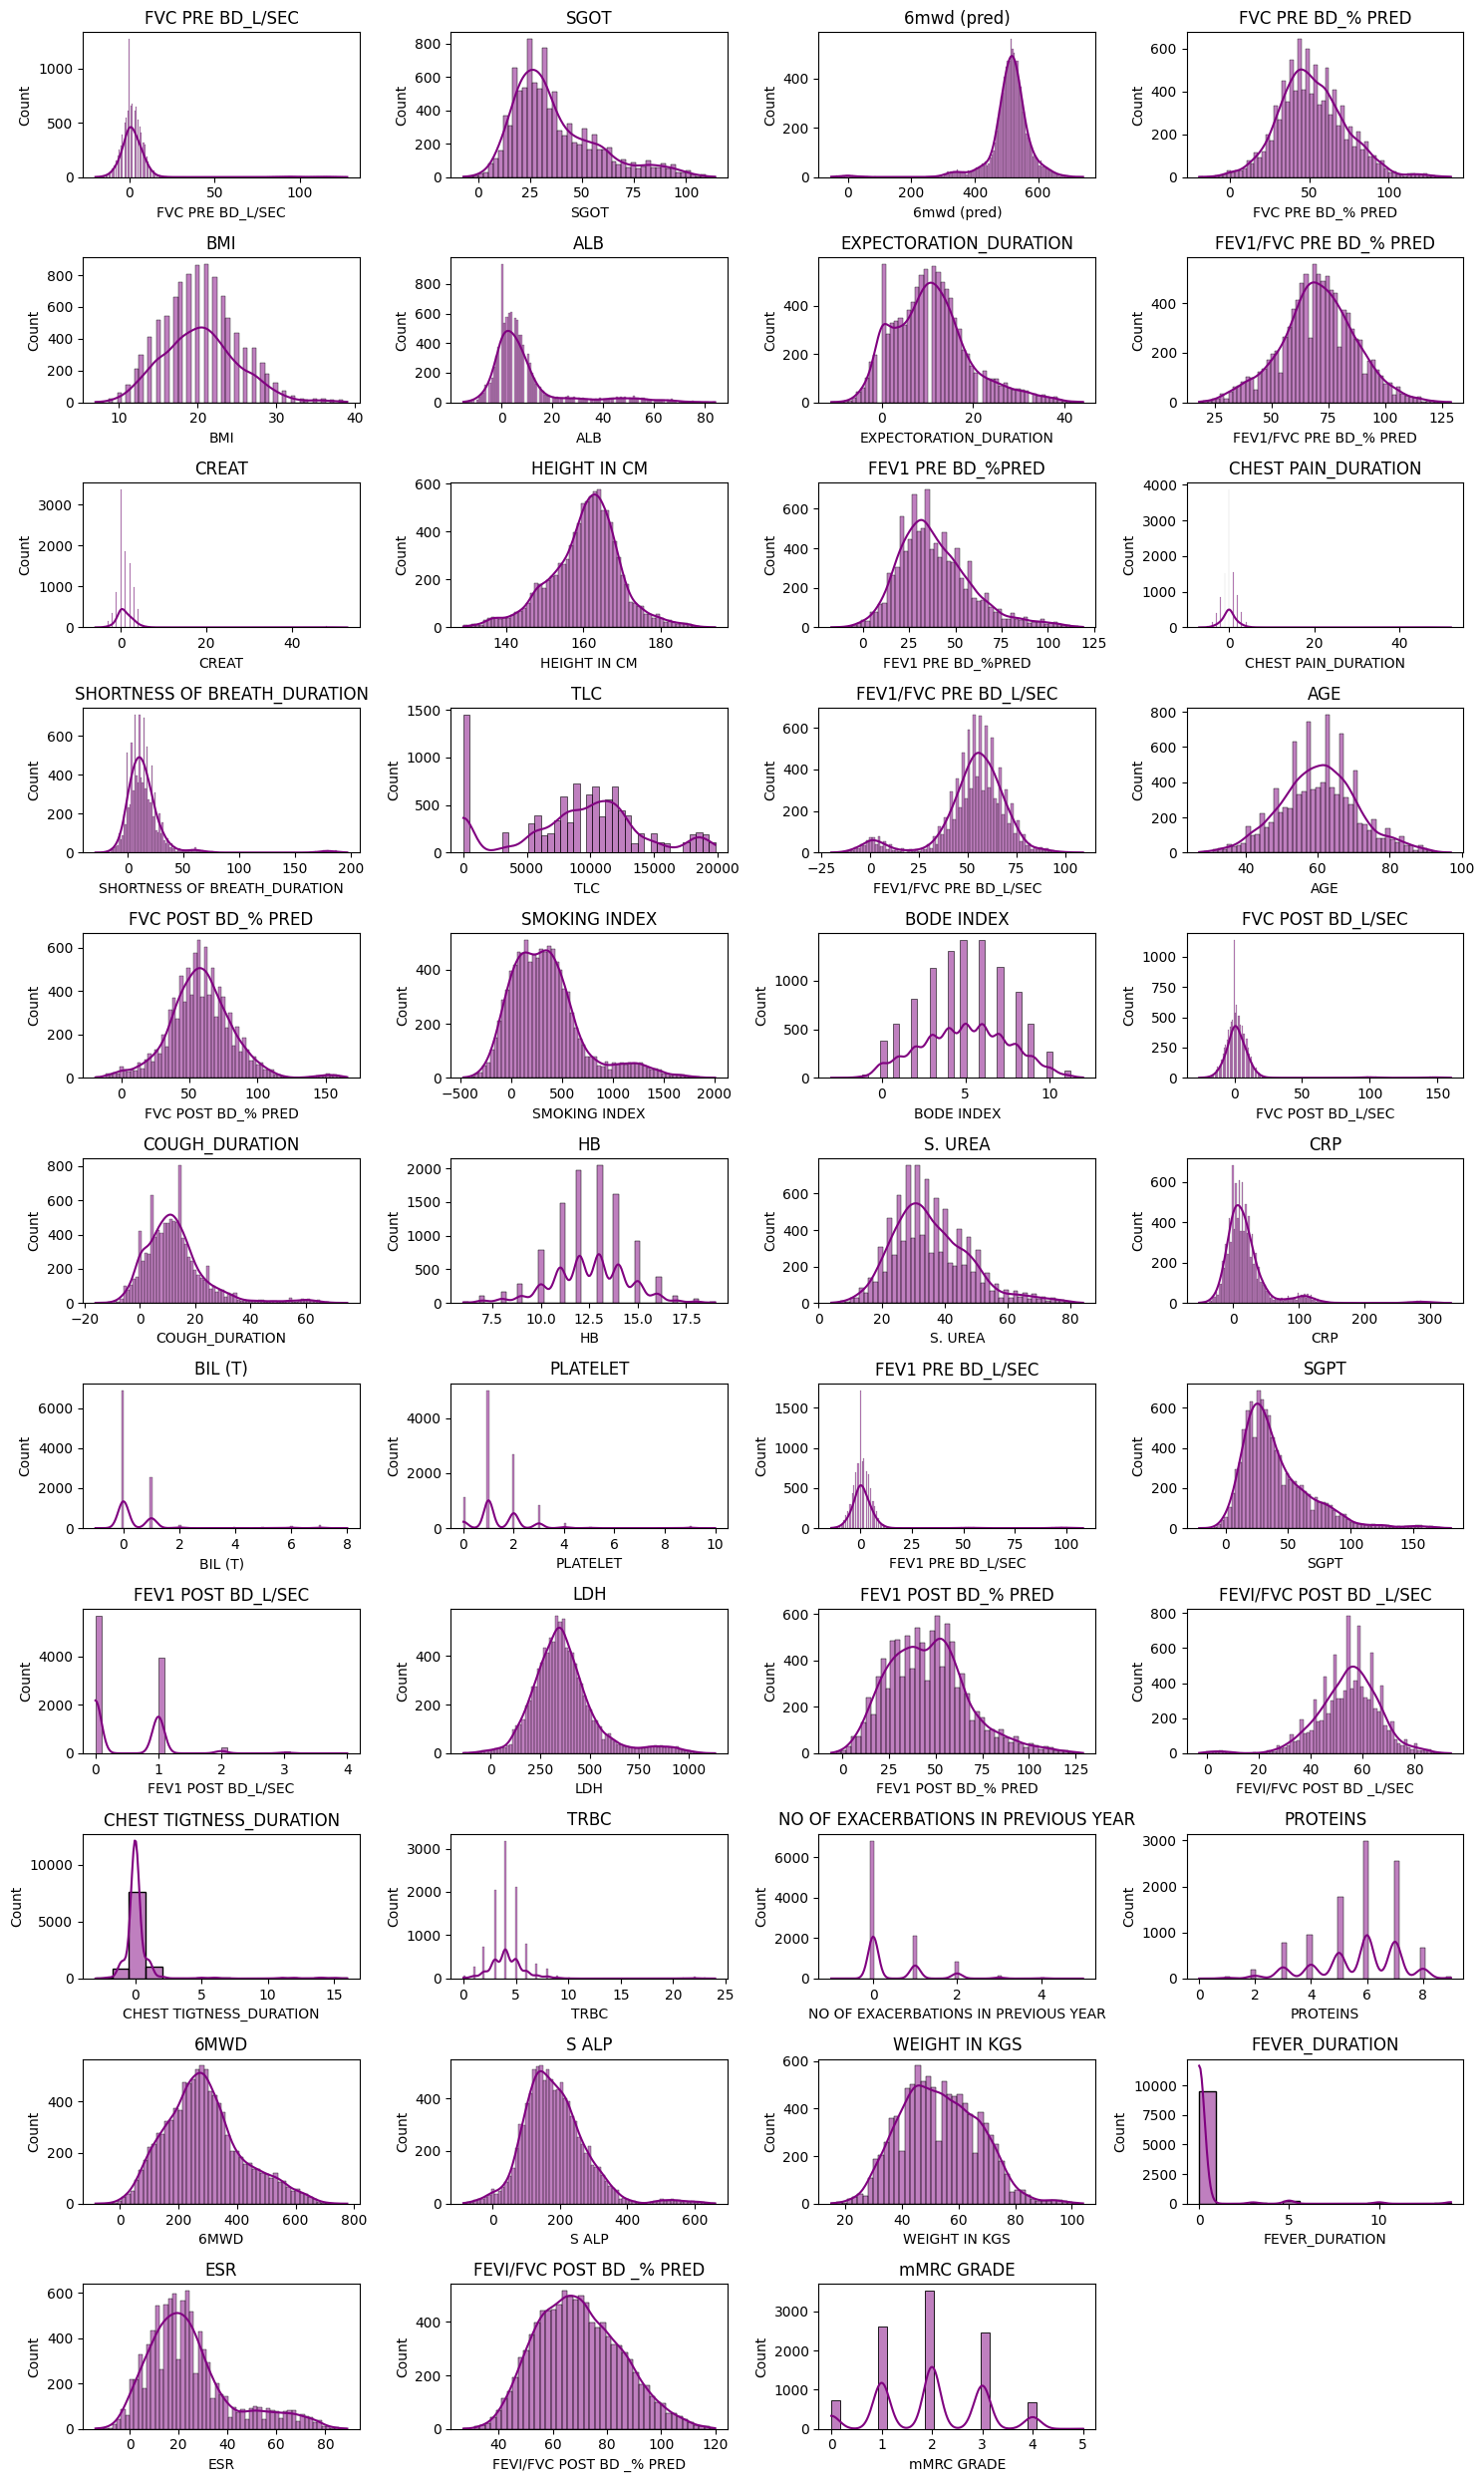

In [31]:
# Histograms of Numeircal Columns
plt.figure(figsize=(15, 25))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(11, 4, i)
    sns.histplot(df[var], kde=True, color="purple")
    plt.title(var)

plt.tight_layout()
plt.show()

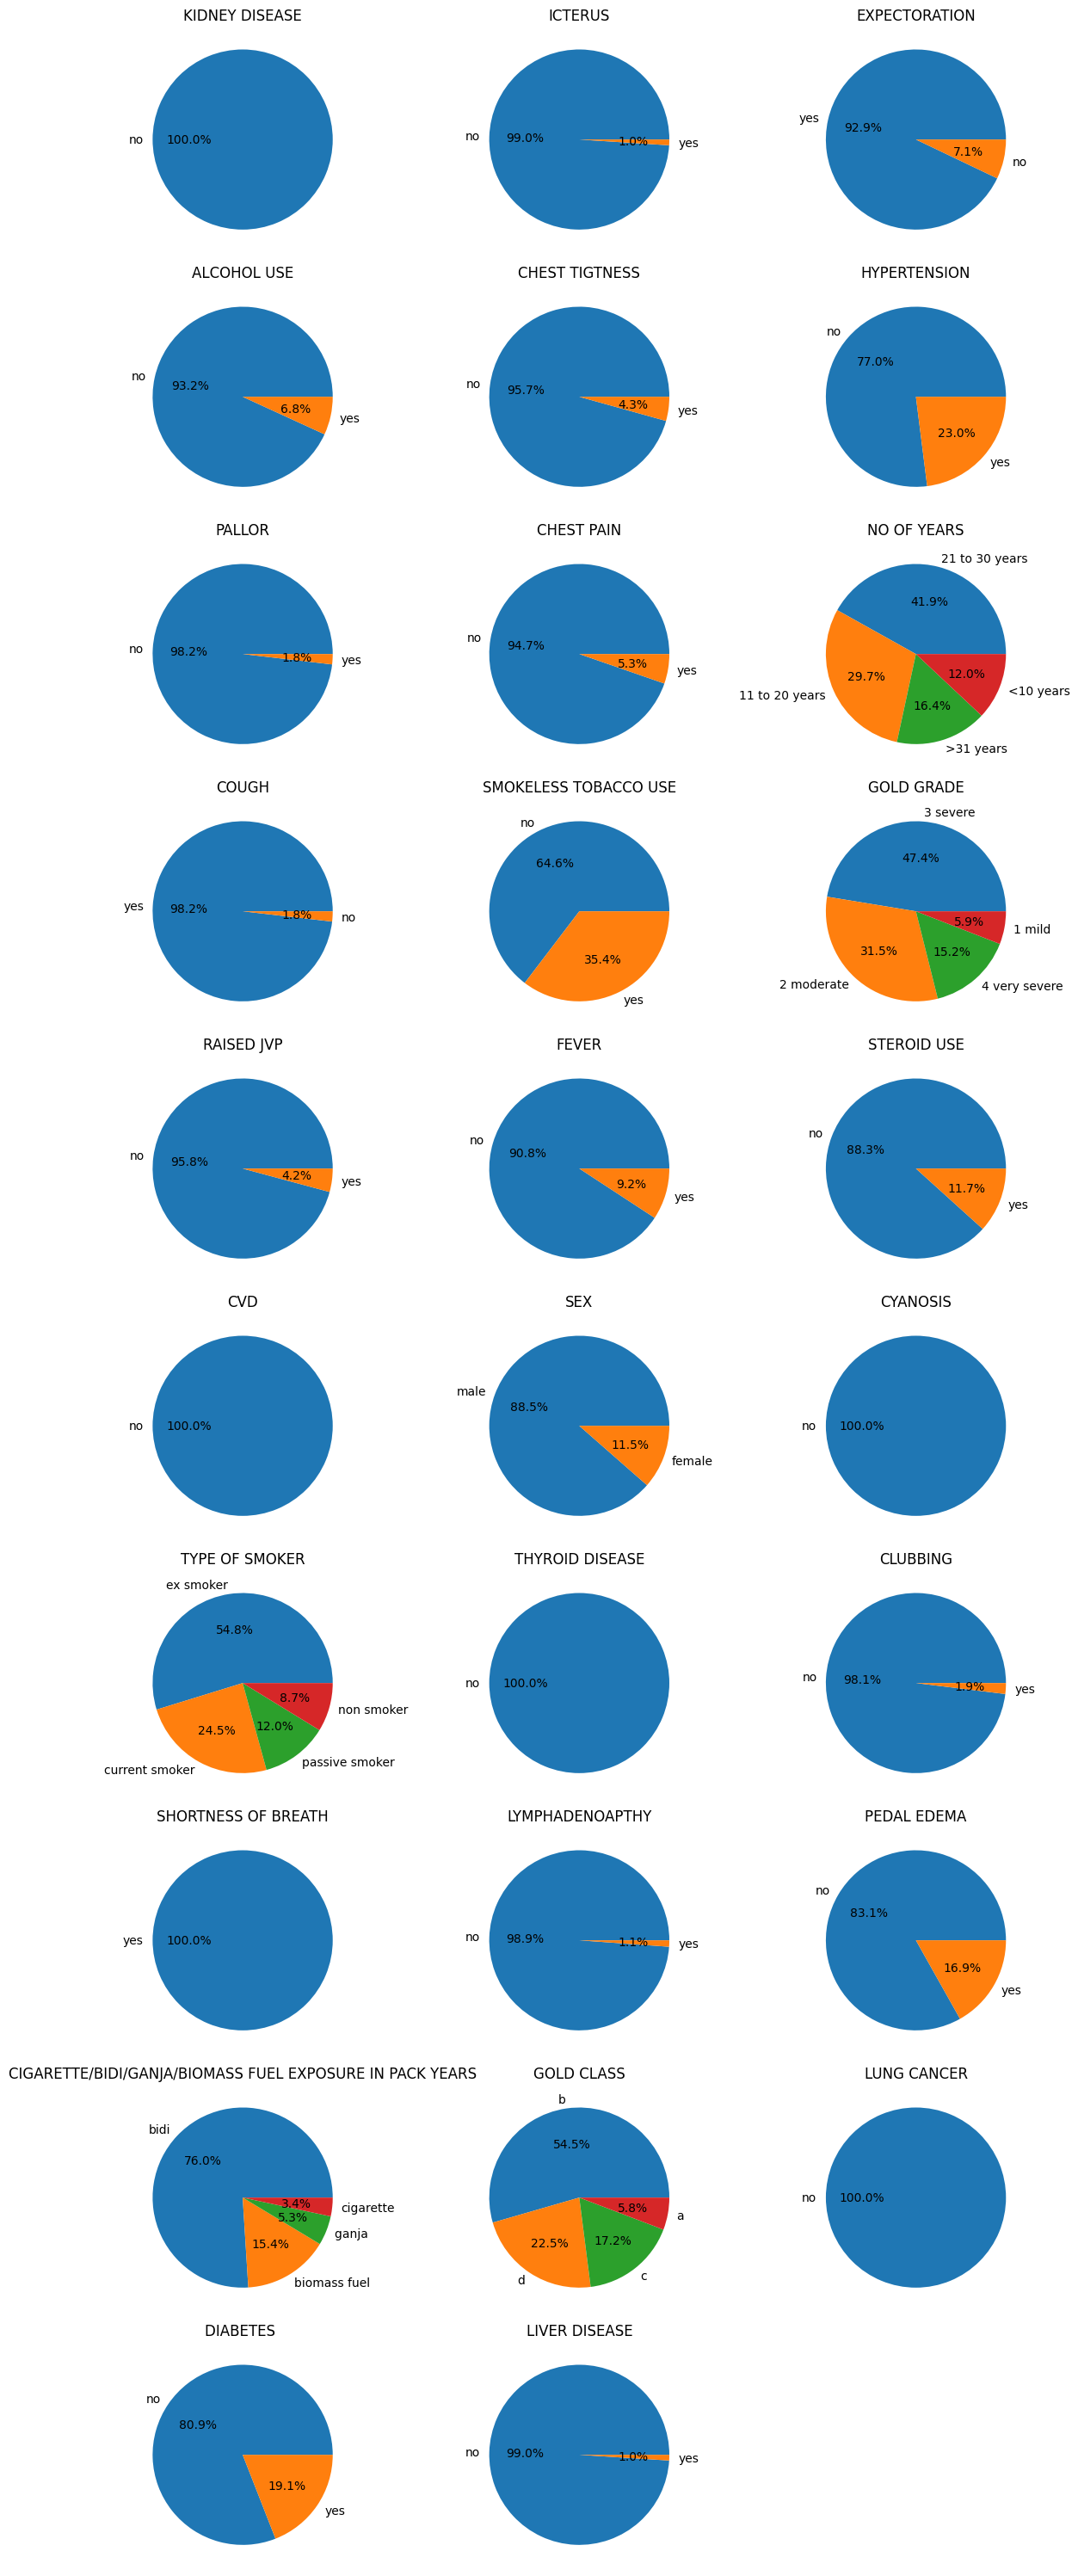

In [32]:
plt.figure(figsize=(12, 45))
for i, var in enumerate(categorical_columns, 1):
    plt.subplot(15, 3, i)
    df[var].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title(var)
    plt.ylabel("")

plt.tight_layout()
plt.show()

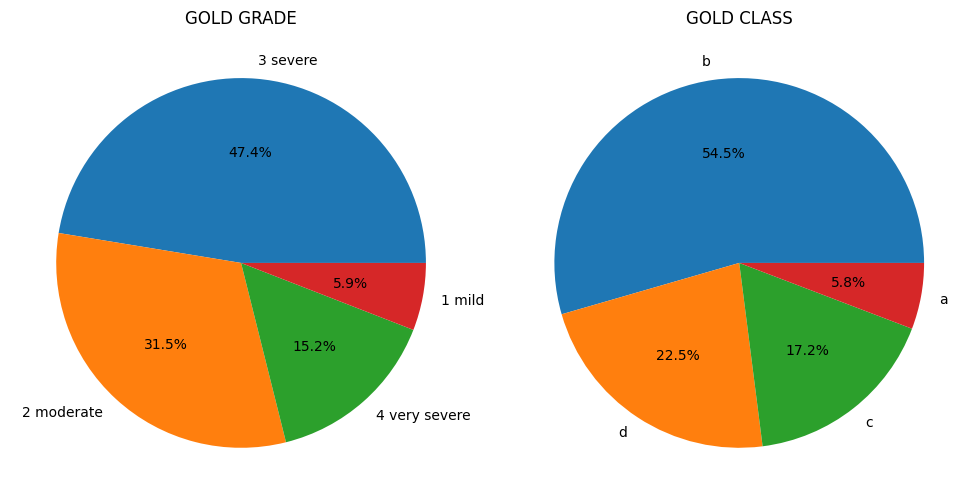

In [34]:
# Pie chart for Gold Grade and Gold Class
plt.figure(figsize=(10, 10))
for i, var in enumerate(["GOLD GRADE", "GOLD CLASS"], 1):
    plt.subplot(1, 2, i)
    df[var].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title(var)
    plt.ylabel("")

plt.tight_layout()
plt.show()

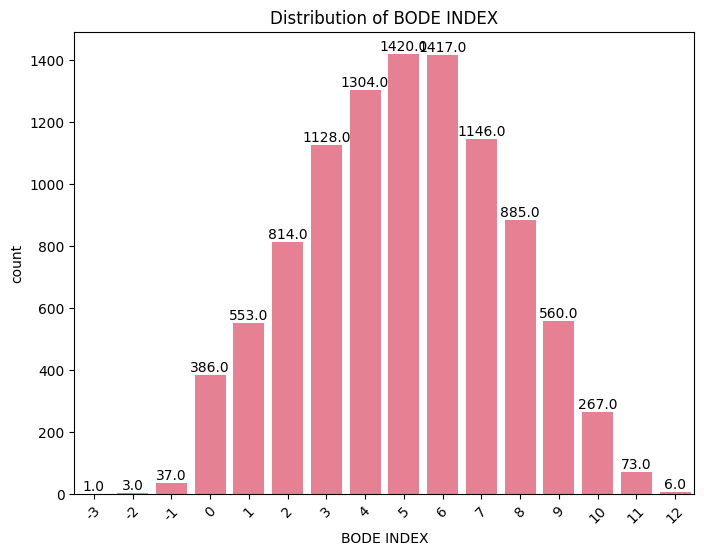

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="BODE INDEX", data=df, ax=ax, palette=[colors[0]])

# Add annotations above each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

ax.set_title("Distribution of BODE INDEX", fontsize=12)
ax.tick_params(axis="x", rotation=45)
plt.show()

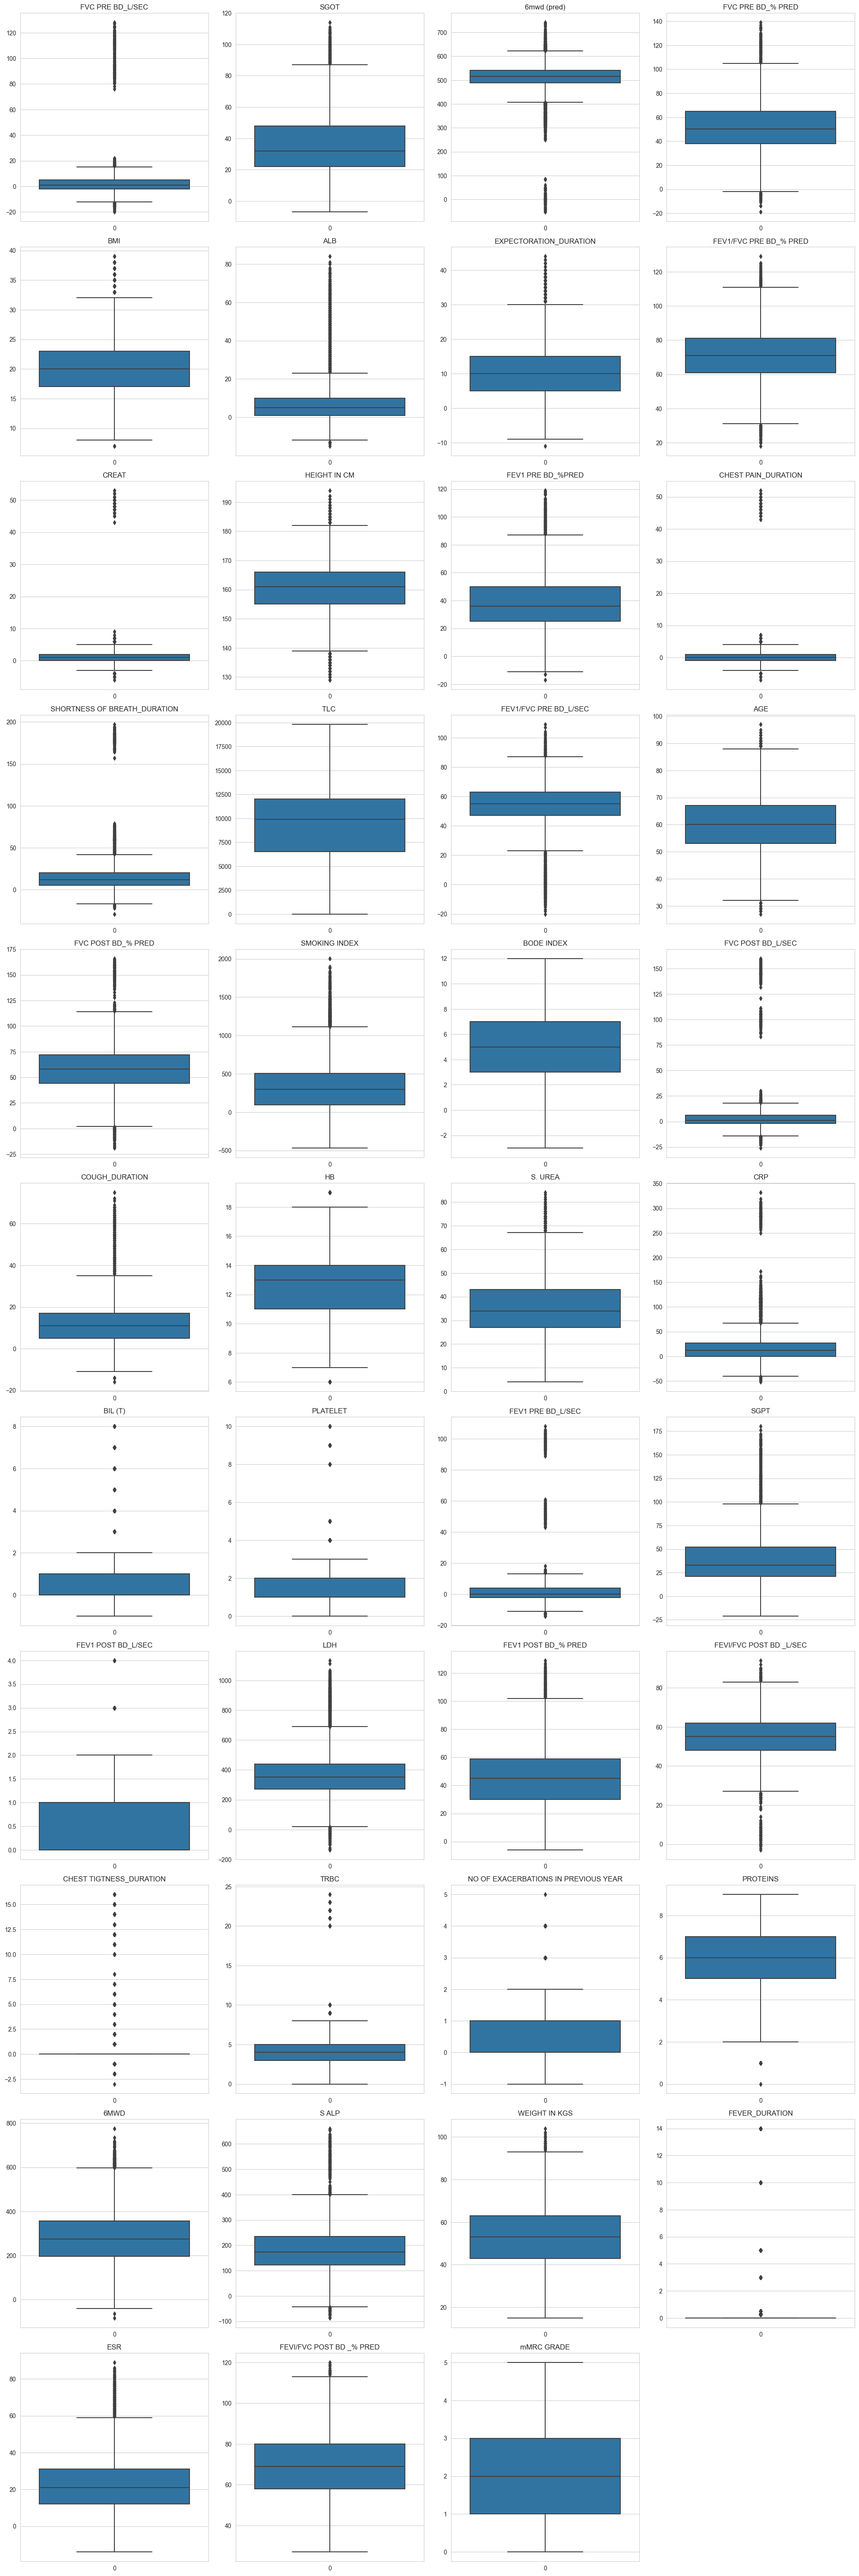

In [38]:
plt.figure(figsize=(20, 65))
sns.set_style("whitegrid")

for i, var in enumerate(numerical_columns, 1):
    plt.subplot(12, 4, i)
    sns.boxplot(data=df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

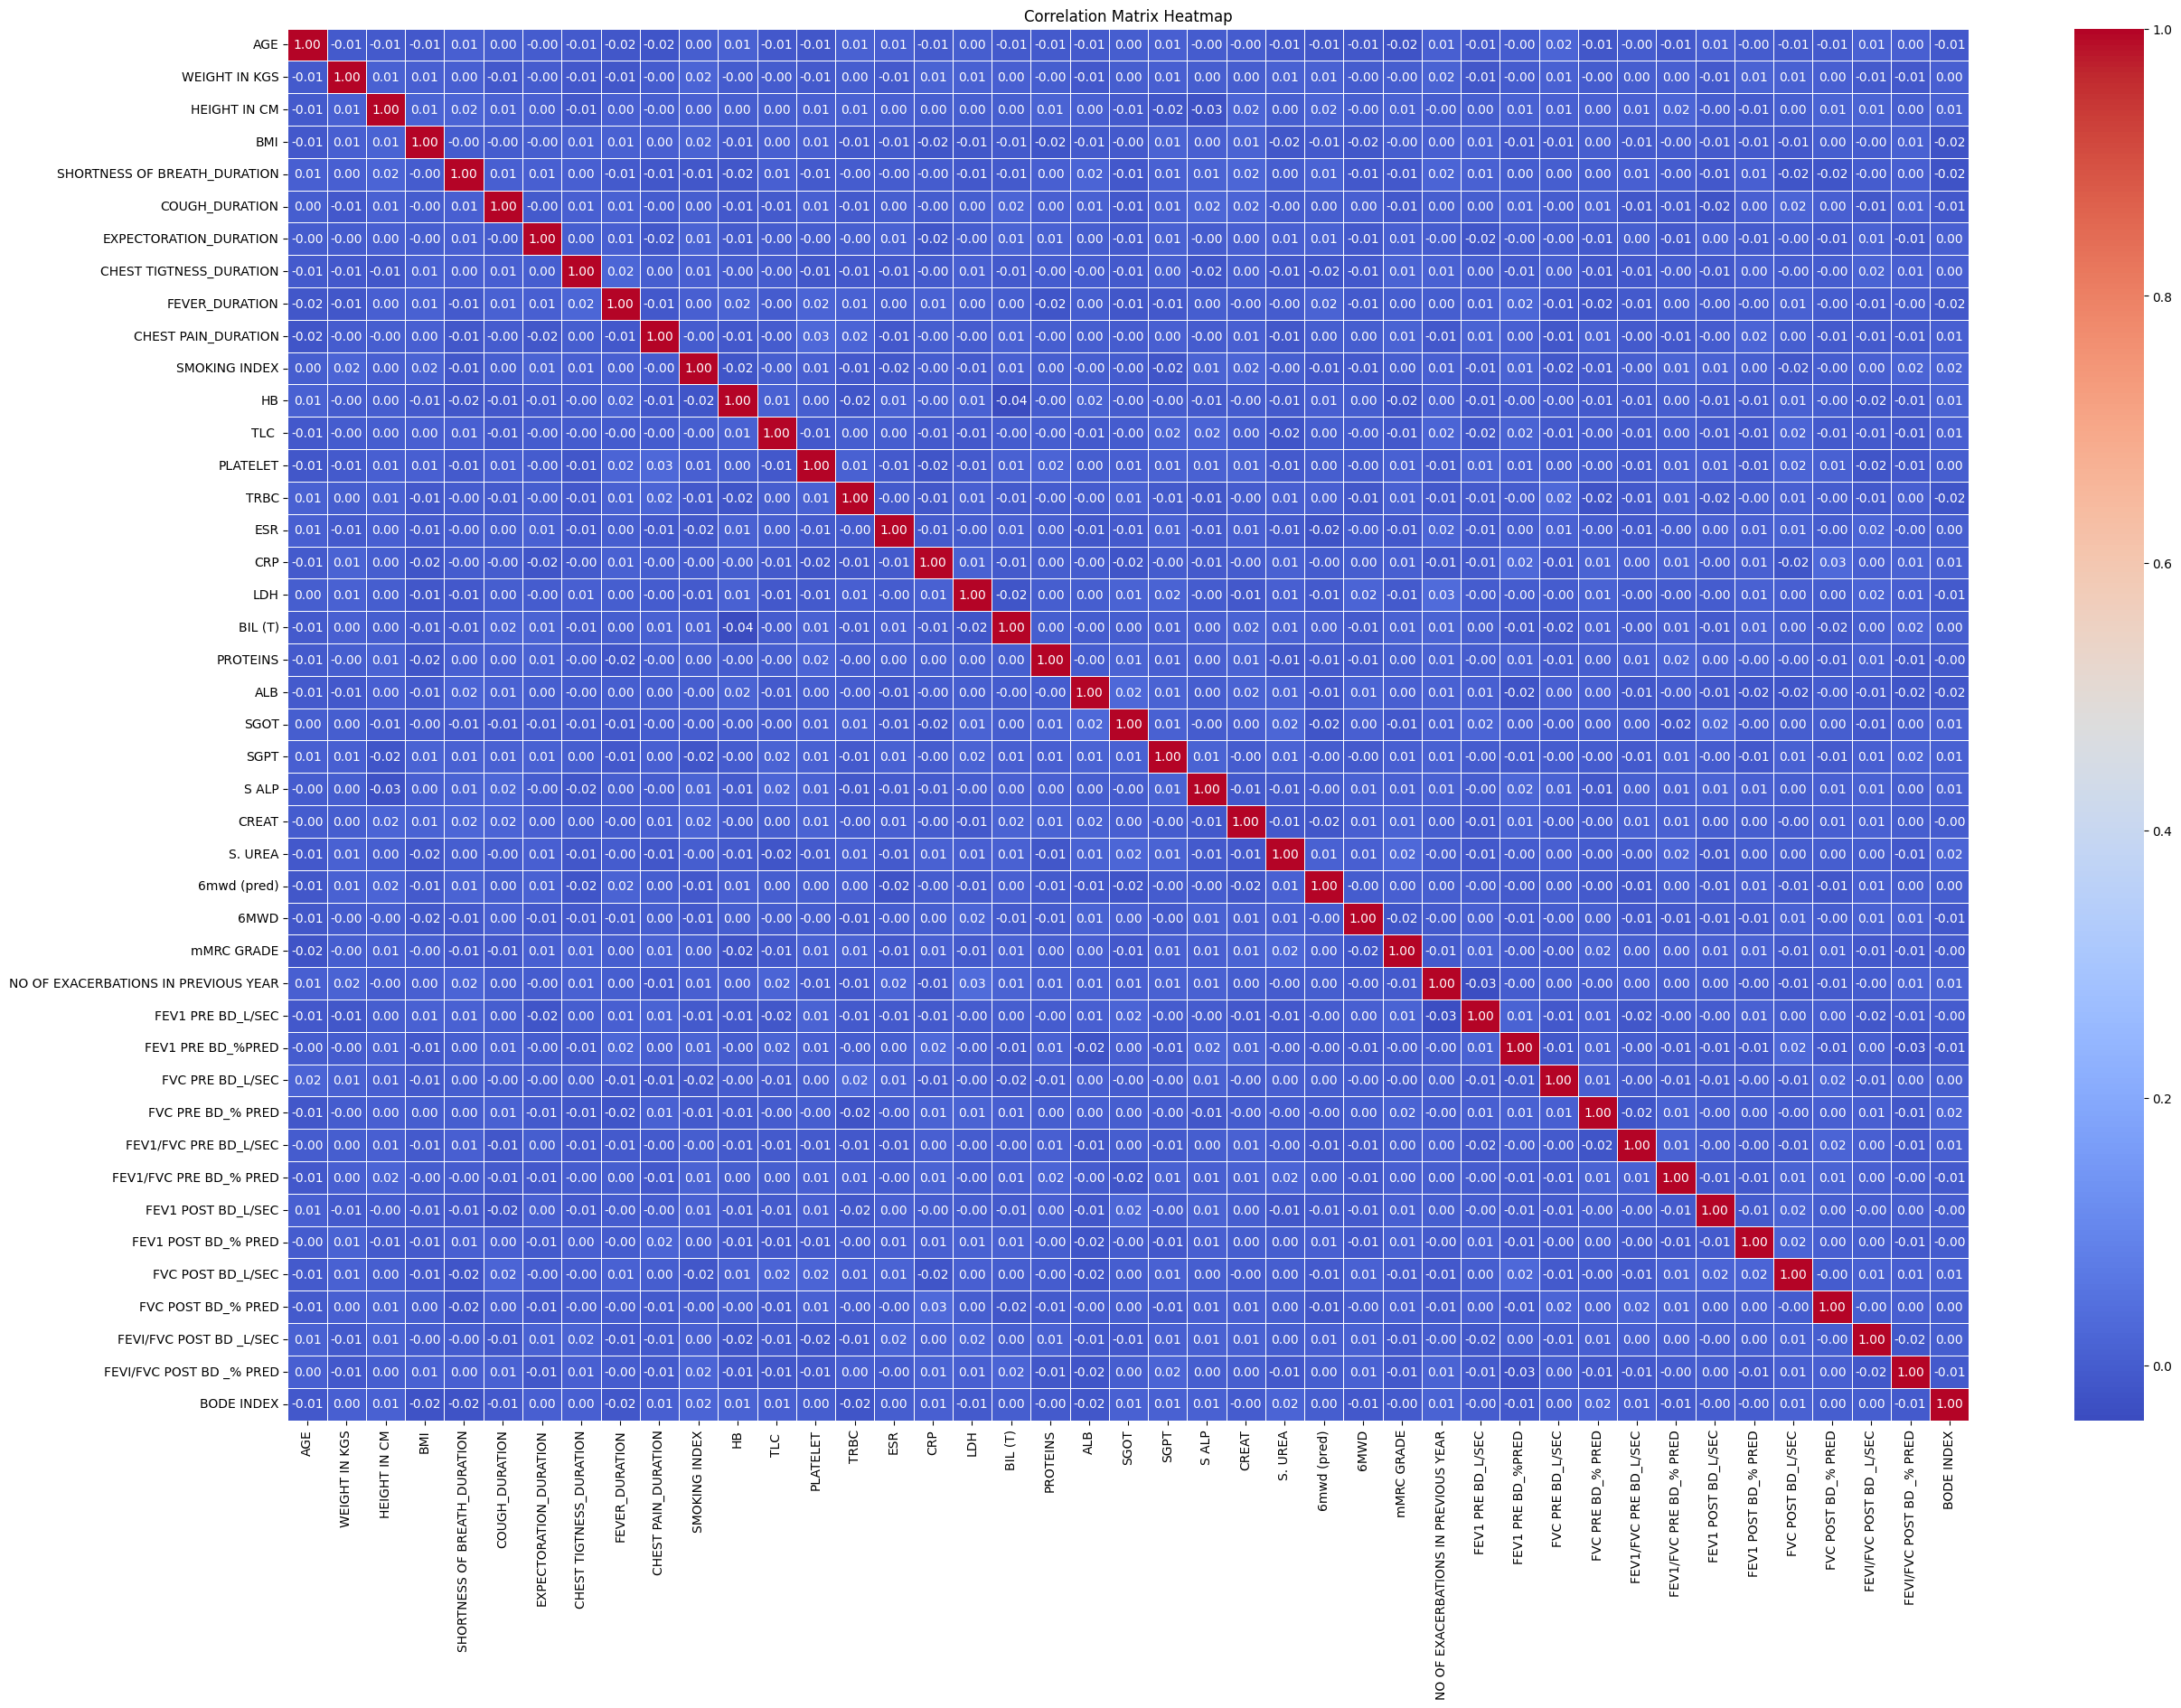

In [37]:
numeric_df = df.select_dtypes(include=["number"])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()